# TABLE OF CONTENTS

- [About The Competition](#💡-About-The-Competition)
- [Importing Libs](#importing-libs)
- [Data Loading Pipeline](#1-data-loading-pipeline)
    - [Train Set](#train-set)
    - [Test Set](#test-set)
- [Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
    - [Data Set Top 5 Columns](#data-set-top-5-columns)
    - [Data Set Columns](#data-set-columns)
    - [Data Set Shape](#data-set-shape)
    - [Data Set Description](#data-set-description)
    - [Reseting Data Set Id](#reseting-data-set-id)
    - [Checking For Null Values in Data Sets](#checking-for-null-values-in-data-sets)
    - [Continuous Features](#continuous-features)
        - [Getting Continous Features (Numeric Features)](#getting-continous-features-numeric-features)
        - [Histogram](#histogram)
        - [Box-Plot](#box-plot)
        - [Density Plot](#density-plot)
        - [Scatter Plot](#scatter-plot)
    - [For Categorical Features](#for-categorical-features)
        - [Getting Categorical Features](#getting-categorical-features)
        - [Printing All Unique Items In Categorical Colum](#printing-all-unique-items-in-categorical-colum)
        - [Barchart](#barchart)
        - [Stacked Bar Plot](#stacked-bar-plot)
        - [Count Plot](#count-plot)
        - [HeatMap](#heatmap)
- [Insights From Visualisation/EDA](#insights-from-visualisationeda)
- [Data Cleaning and Preprocessing](#3-data-cleaning-and-preprocessing)
    - [Check if there's missing Values](#check-if-theres-missing-values)
    - [Check for Duplicates](#check-for-duplicates)
    - [Check for Invalid or Out-of-Range Values](#check-for-invalid-or-out-of-range-values)
- [Removing Duplicates](#removing-duplicates)
- [Feature Selection and Engineering](#4-feature-selection-and-engineering)
    - [Getting Mid Point of Ages](#getting-mid-point-of-ages)
    - [Adding features to boost algorithm](#adding-features-to-boost-algorithm)
- [Splitting Data Set](#splitting-data-set)
    - [Spliting Train Set Into Train Set and Test Set](#spliting-train-set-into-train-set-and-test-set)
    - [Removing Duplicate Income Row From Train Set](#removing-duplicate-income-row-from-train-set)
    - [Encoding Categorical Features for Train and Test Set](#encoding-categorical-features-for-train-and-test-set)
    - [Applying Standard Scalling](#applying-standard-scalling)
- [Model Development](#5-model-development)
    - [Train](#train)

# 💡 About The Competition :
Task:
The objective of this project is to predict whether a candidate is high-risk or low-risk based on their profile data (e.g., transaction patterns, financial indicators, behavioral traits, etc.). The outcome will guide decision-making in processes such as approvals, onboarding, or escalations.

---


Evaluation:
Model performance will be assessed using the following metrics:

Accuracy – Proportion of correctly classified candidates.

Precision – Proportion of correctly predicted high-risk candidates among all predicted high-risk candidates.

Recall (Sensitivity) – Proportion of actual high-risk candidates that were correctly identified.

F1-Score – Harmonic mean of precision and recall, balancing both false positives and false negatives.

ROC-AUC – Measures the model’s ability to distinguish between high-risk and low-risk classes across different thresholds.

Confusion Matrix – Provides a complete picture of true positives, false positives, true negatives, and false negatives.

# IMPORTING LIBS

In [1]:
!pip install xgboost
!pip install category_encoders
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00


In [2]:
# Basic libraries
import pandas as pd
import numpy as np
import re
import warnings
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Model selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# First, ensure the library is installed (uncomment if needed)
# !pip install category_encoders

# Import encoders
from category_encoders import TargetEncoder, BinaryEncoder



# 📦 Explanation of Python Libraries Used in This Project

This section explains the purpose of each imported library or tool in simple terms, especially for non-technical readers.

---

## 🧰 Basic Libraries

| **Library** | **Purpose** |
|-------------|-------------|
| `pandas as pd` | Used for handling **data tables** (like Excel in Python). |
| `numpy as np` | Used for **numerical operations** and working with arrays. |
| `re` | Helps with **cleaning and searching text patterns** using regular expressions. |
| `warnings` | Used to **suppress warning messages** for cleaner outputs. |

---

## 📊 Data Visualization

| **Library** | **Purpose** |
|-------------|-------------|
| `matplotlib.pyplot as plt` | Creates **basic graphs and charts** (line plots, bar graphs, etc.). |
| `seaborn as sns` | Creates **beautiful and informative charts**, especially for statistical data. |

---

## 🧹 Data Preprocessing

| **Tool** | **Purpose** |
|----------|-------------|
| `StandardScaler` | Makes different features like income and age comparable by **scaling them**. |
| `LabelEncoder`, `OrdinalEncoder`, `OneHotEncoder` | Convert **textual data into numbers** for machine learning. |
| `ColumnTransformer` | Allows applying different transformations to different columns efficiently. |
| `Pipeline` | Chains multiple steps (e.g., cleaning, encoding, modeling) into **one streamlined process**. |
| `SMOTE` | Helps balance the dataset by creating **synthetic examples of the minority class** (e.g., risky applicants). |

---

## ⚙️ Model Selection

| **Tool** | **Purpose** |
|----------|-------------|
| `train_test_split` | Splits the dataset into a **training part** (to learn from) and a **testing part** (to evaluate on). |

---

## 🤖 Machine Learning Models

| **Model** | **Purpose** |
|-----------|-------------|
| `LogisticRegression` | A simple, fast model used for **binary predictions** (e.g., risky or not). |
| `DecisionTreeClassifier` | Makes decisions like a **flowchart** to classify data. |
| `RandomForestClassifier` | Combines many decision trees to improve accuracy. |
| `GradientBoostingClassifier`, `AdaBoostClassifier`, `ExtraTreesClassifier` | Advanced models that use **multiple learners working together** to make better predictions. |
| `SVC` (Support Vector Classifier) | Draws a boundary between classes in complex datasets. |
| `KNeighborsClassifier` | Looks at nearby similar records to decide the outcome. |
| `GaussianNB` | A simple, fast model that uses **probabilities** to make predictions. |
| `XGBClassifier` | A **very powerful model** often used in competitions for tough prediction problems. |

---

## 📏 Evaluation Metrics

| **Metric** | **Purpose** |
|------------|-------------|
| `accuracy_score` | Measures the **percentage of correct predictions**. |
| `roc_auc_score` | Evaluates how well the model **separates risky and non-risky applicants**. |
| `classification_report` | Provides detailed model performance metrics like **precision, recall, and F1 score**. |

---


# 1. DATA LOADING PIPELINE

### Train Set

In [3]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
file_path = 'your_file.csv'

def load_data_train(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df

train_df = load_data_train(file_path, index_col=0)
train_df.head()

--2025-05-05 04:58:26--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16096255 (15M) [text/plain]
Saving to: ‘your_file.csv’

your_file.csv       100%[===================>]  15.35M  98.9MB/s    in 0.2s    

2025-05-05 04:58:27 (98.9 MB/s) - ‘your_file.csv’ saved [16096255/16096255]



Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
172392  4588175   49          20         single          rented            no   
246131  6510821   31          15         single          rented            no   
51741   9338129   26           7         single          rented            no   
143394  8053436   42           8         single          rented            no   
146824  3589662   42          18         single          rented           yes   

              Profession             CITY          STATE  CURRENT_JOB_YRS  \
Id                                                                          
172392         Secretary         Bilaspur   Chhattisgarh                6   
246131         Librarian         Amritsar         Punjab               12   
51741             Artist      Farrukhabad  Uttar_Pradesh                4   
143394              Chef  Mysore[7][8][9]      Karnataka                8   
146824  Technical_writer         Bareilly  Uttar_Pradesh               13   

        CURRENT_HOUSE_YRS  Risk_Flag  
Id                                    
172392                 11          0  
246131                 10          1  
51741                  14          0  
143394                 11          1  
146824                 13          0

### Test Set

In [4]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
test_path = 'test.csv'

def load_data_test(file_path: str, file_type: str = "csv", **kwargs):
    """Loads a dataset based on file type."""
    if file_type == "csv":
        df = pd.read_csv(file_path, **kwargs)
    elif file_type == "excel":
        df = pd.read_excel(file_path, **kwargs)
    elif file_type == "json":
        df = pd.read_json(file_path, **kwargs)
    else:
        raise ValueError("Unsupported file type.")
    return df
test_df = load_data_test(test_path, index_col=0)
test_df.head()

--2025-05-05 04:58:27--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3872224 (3.7M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   3.69M  --.-KB/s    in 0.08s   

2025-05-05 04:58:28 (44.5 MB/s) - ‘test.csv’ saved [3872224/3872224]



Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
76028   2687545   60           3         single          rented           yes   
226614  9559493   77           3         single          rented            no   
65661   5203215   51          19         single          rented            no   
7056    7235618   78          16         single           owned            no   
231613  4408094   30           8         single          rented           yes   

                Profession            CITY           STATE  CURRENT_JOB_YRS  \
Id                                                                            
76028     Technical_writer           Mango       Jharkhand                3   
226614        Army_officer           Sirsa         Haryana                3   
65661        Civil_servant     Hajipur[31]           Bihar                8   
7056                Artist  Tadepalligudem  Andhra_Pradesh               14   
231613  Petroleum_Engineer     Saharsa[29]           Bihar                4   

        CURRENT_HOUSE_YRS  
Id                         
76028                  11  
226614                 13  
65661                  13  
7056                   11  
231613                 10

## DATA SET FEATURES DESCRIPTION

# 🔍 Feature Description and Impact Analysis

This section explains each feature in the dataset and its potential impact on predicting the target variable `Risk_Flag`.

| **Feature**              | **Type**         | **Description**                                                                 | **Potential Impact on Risk_Flag**                                                                                             |
|--------------------------|------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| **Id**                   | Identifier       | Unique identifier for each applicant                                            | ❌ No predictive value. Used only to distinguish rows. Should be dropped before training.                                     |
| **Income**               | Numerical        | Applicant’s income level                                                        | 📉 Lower income may indicate higher financial risk. Often strongly predictive of creditworthiness.                           |
| **Age**                  | Numerical        | Age of the applicant                                                            | 📊 Younger or older individuals may be riskier. May show non-linear effects.                                                 |
| **Experience**           | Numerical        | Total years of professional experience                                          | ✅ More experience implies job stability, reducing risk.                                                                     |
| **Married/Single**       | Categorical      | Marital status of the applicant                                                 | 👪 Married individuals may have more financial responsibilities but also greater stability. Useful for demographic profiling.|
| **House_Ownership**      | Categorical      | Indicates whether the applicant owns, rents, or lives with family               | 🏠 Homeowners may be more financially stable. Renting or no ownership may signal higher risk.                                |
| **Car_Ownership**        | Categorical      | Indicates whether the applicant owns a car                                      | 🚗 Car ownership can suggest higher income or financial stability.                                                           |
| **Profession**           | Categorical      | Job or occupation of the applicant                                              | 💼 Certain professions indicate income level and job security. Can be a strong predictor.                                     |
| **CITY**                 | Categorical      | City of residence                                                               | 🌆 May reflect local economy and living conditions. High-cardinality—consider encoding or grouping.                          |
| **STATE**                | Categorical      | State of residence                                                              | 🗺️ Useful for regional trends. Group low-frequency states to prevent overfitting.                                            |
| **CURRENT_JOB_YRS**      | Numerical        | Number of years in the current job                                              | 📈 Longer job tenure usually indicates stability, lowering risk.                                                             |
| **CURRENT_HOUSE_YRS**    | Numerical        | Number of years in the current residence                                        | 🏡 Long-term residence suggests personal and financial stability.                                                            |
| **Risk_Flag** (target)   | Binary Target    | 1 = Risky applicant, 0 = Not risky                                              | 🎯 This is the target variable you're predicting.                                                                             |




# 2. EXPLORATORY DATA ANALYSIS (EDA)

### Data Set Top 5 Columns

In [5]:
train_df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
172392  4588175   49          20         single          rented            no   
246131  6510821   31          15         single          rented            no   
51741   9338129   26           7         single          rented            no   
143394  8053436   42           8         single          rented            no   
146824  3589662   42          18         single          rented           yes   

              Profession             CITY          STATE  CURRENT_JOB_YRS  \
Id                                                                          
172392         Secretary         Bilaspur   Chhattisgarh                6   
246131         Librarian         Amritsar         Punjab               12   
51741             Artist      Farrukhabad  Uttar_Pradesh                4   
143394              Chef  Mysore[7][8][9]      Karnataka                8   
146824  Technical_writer         Bareilly  Uttar_Pradesh               13   

        CURRENT_HOUSE_YRS  Risk_Flag  
Id                                    
172392                 11          0  
246131                 10          1  
51741                  14          0  
143394                 11          1  
146824                 13          0

In [6]:
test_df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
76028   2687545   60           3         single          rented           yes   
226614  9559493   77           3         single          rented            no   
65661   5203215   51          19         single          rented            no   
7056    7235618   78          16         single           owned            no   
231613  4408094   30           8         single          rented           yes   

                Profession            CITY           STATE  CURRENT_JOB_YRS  \
Id                                                                            
76028     Technical_writer           Mango       Jharkhand                3   
226614        Army_officer           Sirsa         Haryana                3   
65661        Civil_servant     Hajipur[31]           Bihar                8   
7056                Artist  Tadepalligudem  Andhra_Pradesh               14   
231613  Petroleum_Engineer     Saharsa[29]           Bihar                4   

        CURRENT_HOUSE_YRS  
Id                         
76028                  11  
226614                 13  
65661                  13  
7056                   11  
231613                 10

### Data Set Columns

In [7]:
train_df.columns, test_df.columns

(Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS', 'Risk_Flag'],
       dtype='object'),
 Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
        'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
        'CURRENT_HOUSE_YRS'],
       dtype='object'))

### Data Set Shape
*   Columns
*   Rows







In [8]:
train_df.shape,  test_df.shape

((201600, 12), (50400, 11))

### Data Set Description

In [9]:
train_df.describe()

Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.016000e+05  201600.000000  201600.000000    201600.000000   
mean   4.995703e+06      49.967381      10.084831         6.337341   
std    2.877975e+06      17.070446       6.000642         3.648956   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.502700e+06      35.000000       5.000000         3.000000   
50%    4.998898e+06      50.000000      10.000000         6.000000   
75%    7.475587e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag  
count      201600.000000  201600.000000  
mean           11.997584       0.122798  
std             1.398472       0.328206  
min            10.000000       0.000000  
25%            11.000000       0.000000  
50%            12.000000       0.000000  
75%            13.000000       0.000000  
max            14.000000       1.000000

### Reseting Data Set Id

In [10]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

### Checking For Null Values in Data Sets

In [11]:
train_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [12]:
test_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

### Checking all unique items on the dataset

In [13]:
def unique_items_in_column(df, column_names=None):
    # printing all unique items in data set

    if column_names is None:
        column_names = df.columns.tolist()

    results = {}
    for col in column_names:
        if col in df.columns:
            unique_items = df[col].unique()
            num_unique = len(unique_items)
            results[col] = (num_unique, unique_items)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return results


In [14]:
# train set
unique_items_in_column(train_df)

{'Income': (34602,
  array([4588175, 6510821, 9338129, ..., 5407806, 5683255, 2287051])),
 'Age': (59,
  array([49, 31, 26, 42, 59, 69, 68, 41, 32, 58, 34, 47, 60, 23, 65, 27, 48,
         30, 24, 78, 71, 25, 56, 79, 74, 77, 72, 67, 37, 63, 28, 46, 21, 45,
         40, 35, 70, 53, 50, 62, 38, 33, 61, 66, 39, 73, 57, 75, 64, 51, 44,
         29, 36, 22, 55, 54, 43, 76, 52])),
 'Experience': (21,
  array([20, 15,  7,  8, 18,  1, 11,  6,  0, 10, 19,  5,  9,  3,  2, 14, 16,
         17, 13,  4, 12])),
 'Married/Single': (2, array(['single', 'married'], dtype=object)),
 'House_Ownership': (3,
  array(['rented', 'owned', 'norent_noown'], dtype=object)),
 'Car_Ownership': (2, array(['no', 'yes'], dtype=object)),
 'Profession': (51,
  array(['Secretary', 'Librarian', 'Artist', 'Chef', 'Technical_writer',
         'Firefighter', 'Mechanical_engineer', 'Surveyor', 'Physician',
         'Chemical_engineer', 'Microbiologist', 'Industrial_Engineer',
         'Geologist', 'Designer', 'Civil_servant'

## Univariate Analysis


**Goal:** Understand the distribution and nature of each individual variable.



**Steps:**

**Categorization of Variables**  
- **Numerical Variables:** Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS  
- **Categorical Variables:** Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, Risk_Flag



**Analysis of Numerical Variables**

**Charts Used:**  
- **Histogram / KDE Plot**: Used for Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS to visualize the distribution of data, assess skewness, and identify potential outliers.  
- **Boxplot**: Applied to the same variables to detect outliers and compare distributions. For example, comparing CURRENT_JOB_YRS with CURRENT_HOUSE_YRS.

**Purpose:**  
To evaluate central tendency (mean or median), variability (variance), and distribution shape (skewness) of individual numerical features.



**Analysis of Categorical Variables**

**Charts Used:**  
- **Bar Chart / Count Plot**: Used for variables such as Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, and Risk_Flag to assess the frequency distribution of categories.

**Purpose:**  
To detect dominant or rare categories and identify potential class imbalances that may influence modeling or require preprocessing adjustments.



### Categorize variables

In [15]:
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=np.number).columns.tolist()

print(categorical_features)
print(numerical_features)

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


## Analyze Numerical Columns

### History and KDE Plot : Visualize distribution, detect skewness or outliers.

### Plot Histogram, KDE and Boxplot

In [16]:
def plot_numerical_summary(
    df,
    plot_type='hist',      # Options: 'hist', 'kde', 'box'
    bins=30,
    kde=True,
    color='skyblue',
    figsize=(18, 6),
    cols_per_row=3
):

    numerical_cols = df.select_dtypes(include='number').columns
    n_cols = len(numerical_cols)

    if n_cols == 0:
        print("No numerical columns to plot.")
        return

    n_rows = math.ceil(n_cols / cols_per_row)
    fig_height = figsize[1] * n_rows
    fig_width = figsize[0]

    plt.figure(figsize=(fig_width, fig_height))

    for idx, col in enumerate(numerical_cols, 1):
        plt.subplot(n_rows, cols_per_row, idx)

        if plot_type == 'hist':
            sns.histplot(df[col].dropna(), bins=bins, kde=kde, color=color)
        elif plot_type == 'kde':
            sns.kdeplot(df[col].dropna(), fill=True, color=color)
        elif plot_type == 'box':
            sns.boxplot(x=df[col], color=color)
        else:
            raise ValueError("plot_type must be 'hist', 'kde', or 'box'.")

        plt.title(col)
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()


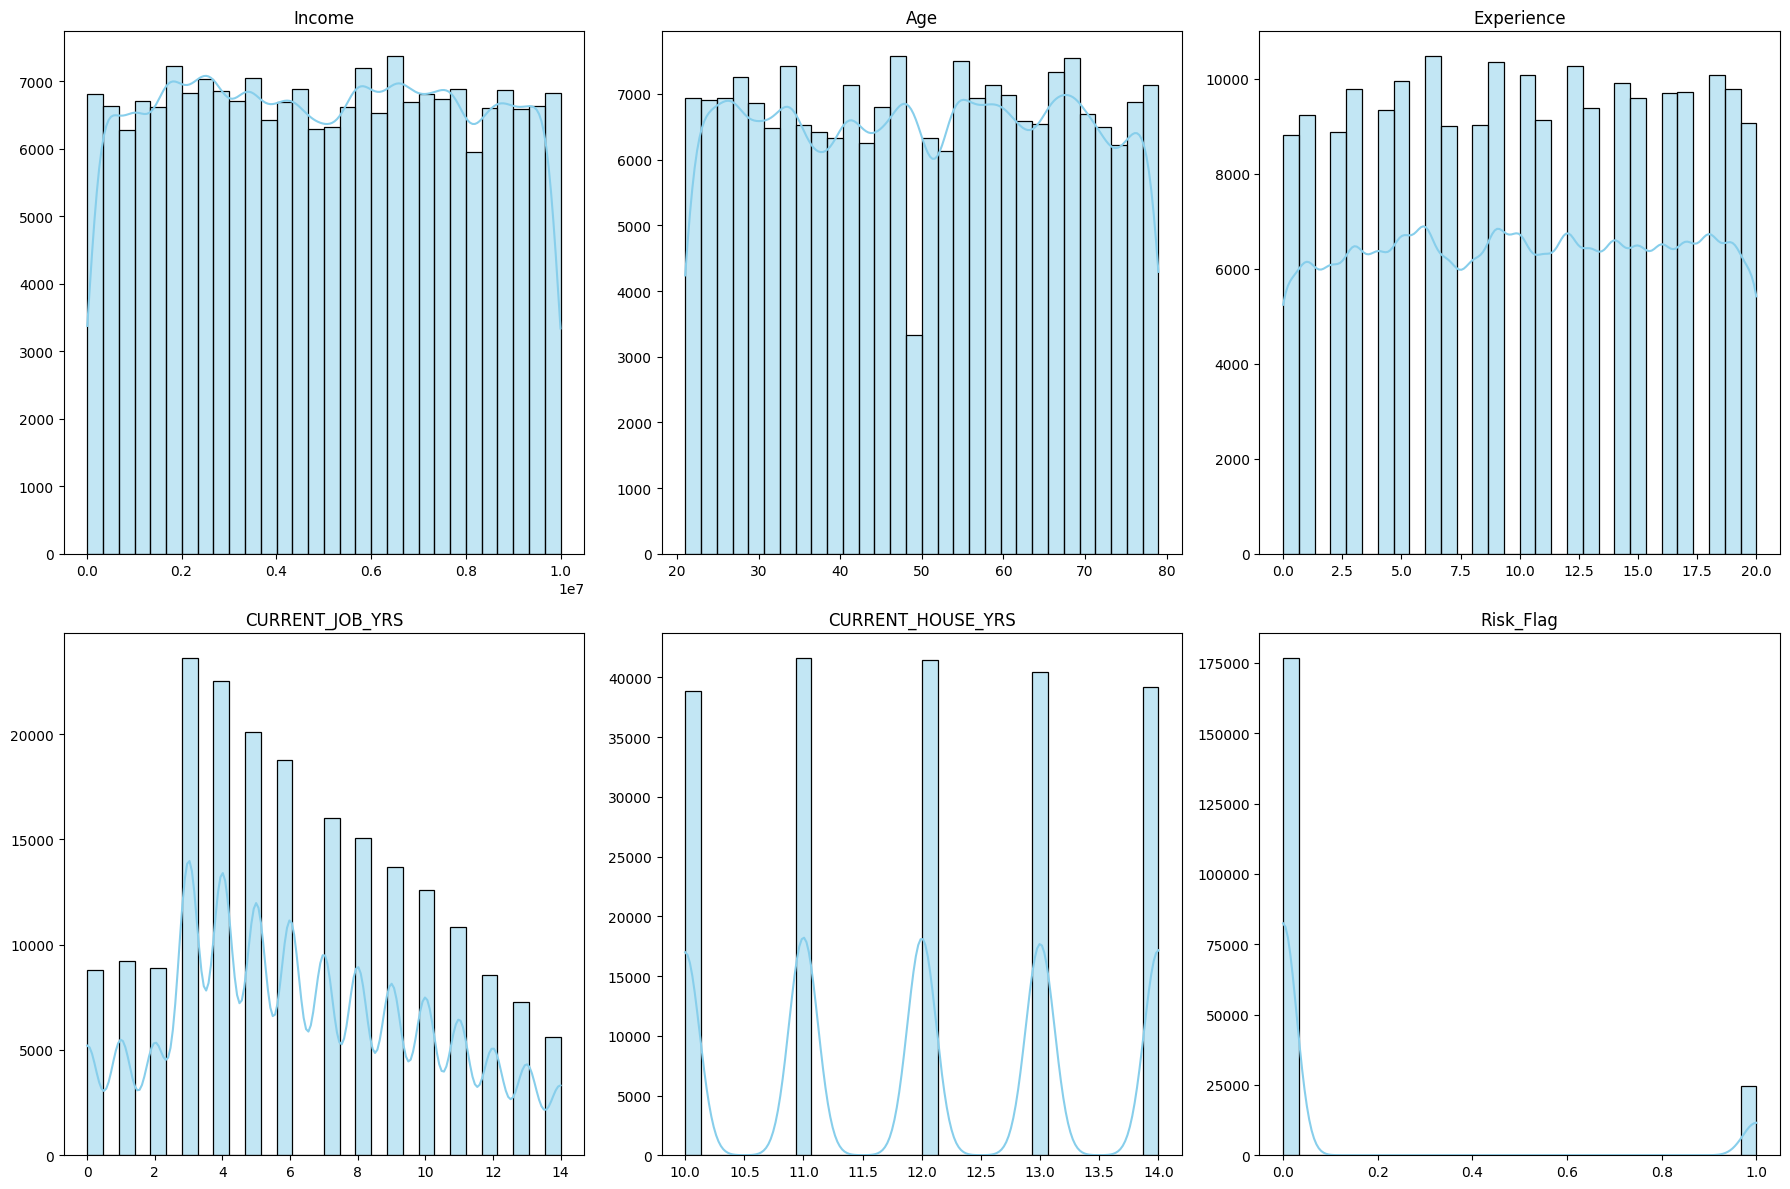

In [17]:
# Histogram
plot_numerical_summary(train_df[numerical_features], plot_type='hist')

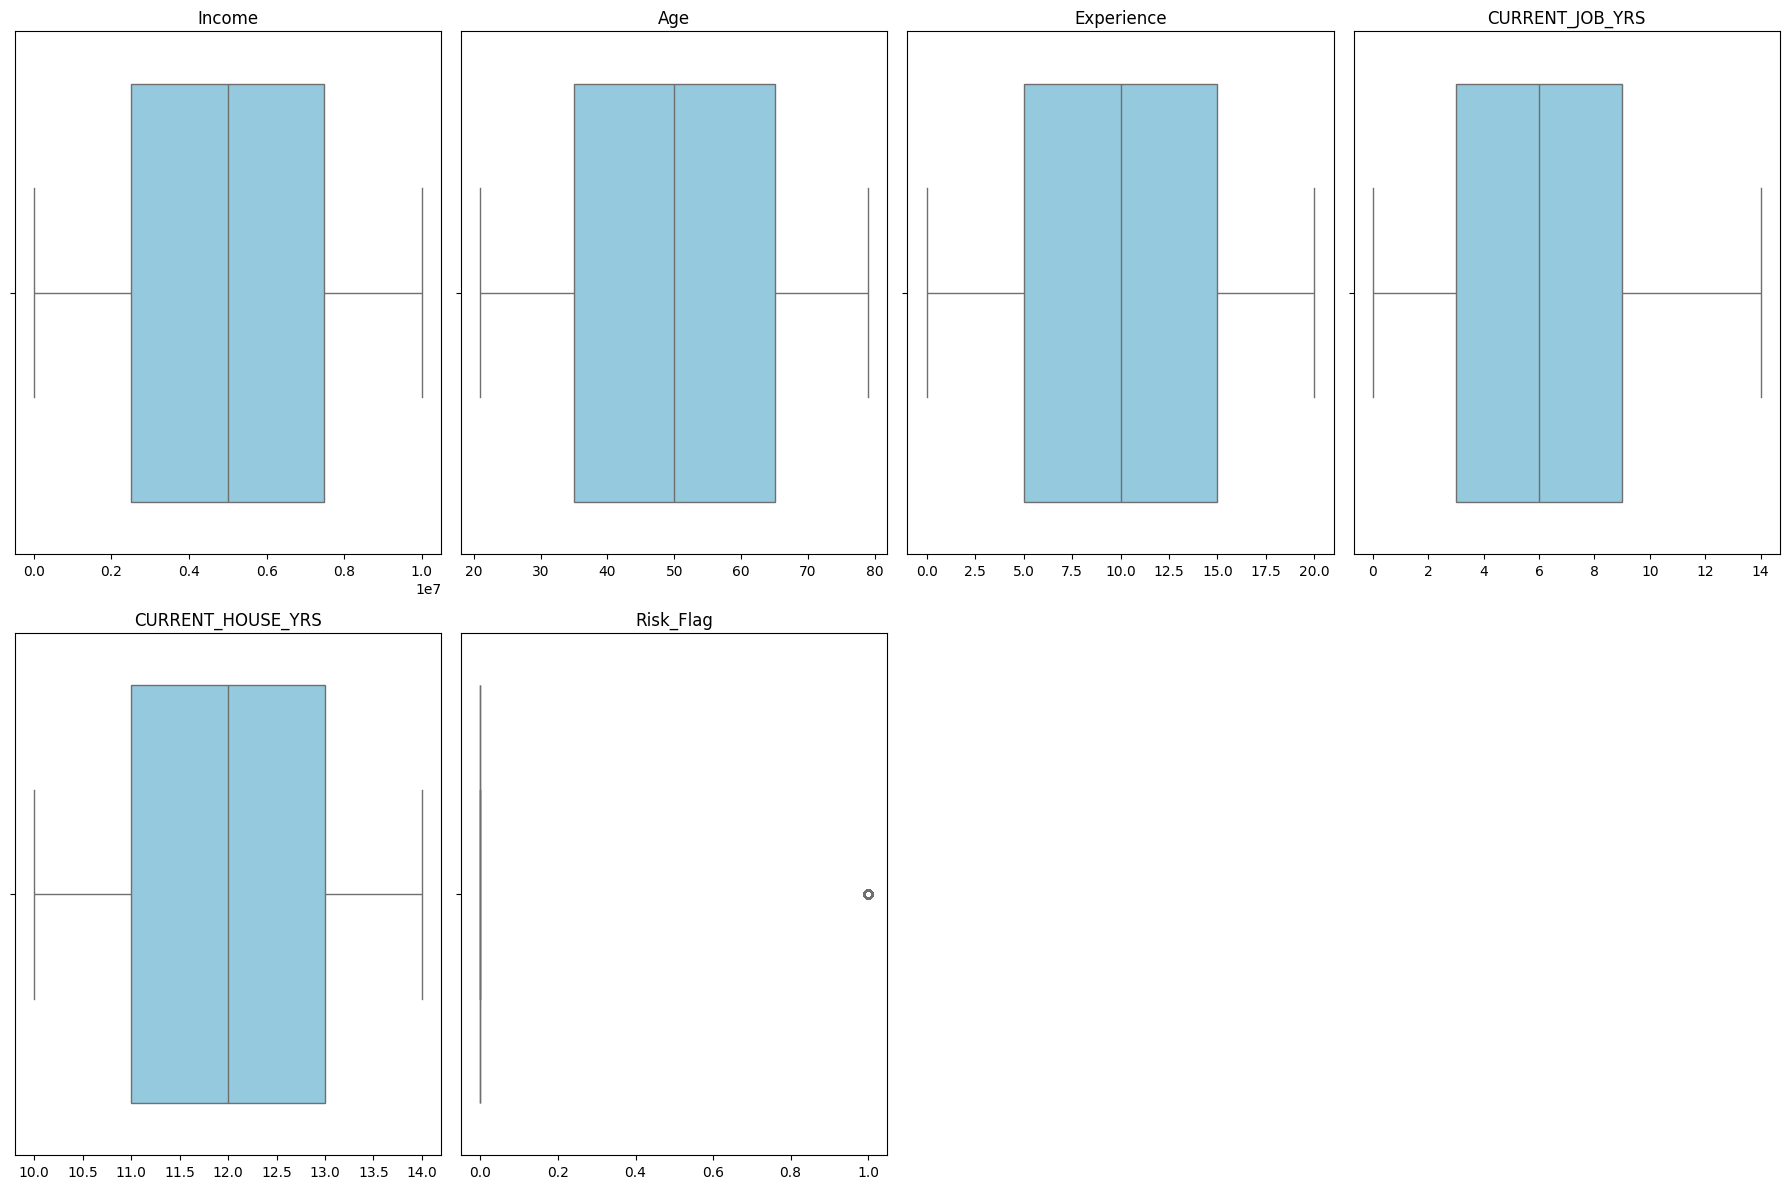

In [18]:
# Boxplot
plot_numerical_summary(train_df[numerical_features], plot_type='box', cols_per_row=4)

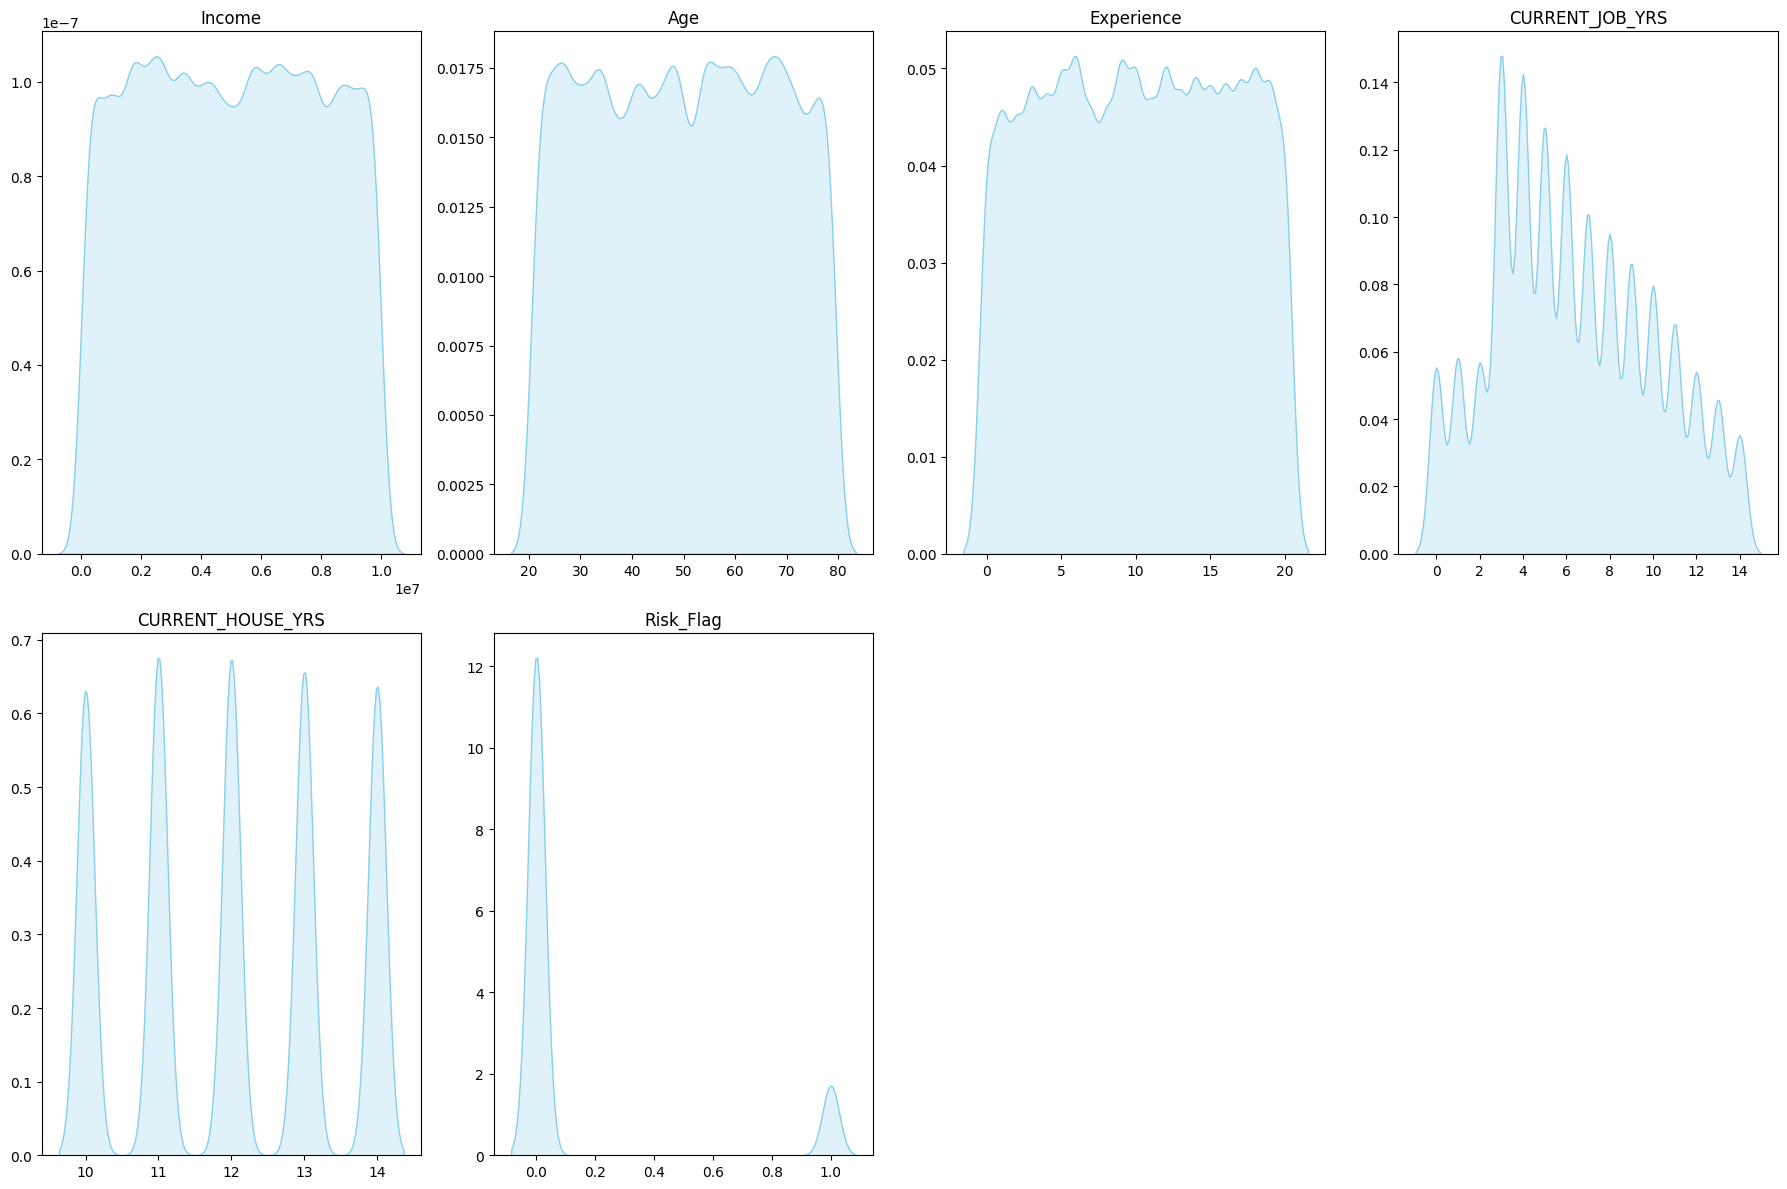

In [19]:
plot_numerical_summary(train_df[numerical_features], plot_type='kde', cols_per_row=4)

## Analyze Categorical Columns

### BarChart/Count Plot : See frequency of each category and detect imbalance.

### Plot BarChart and Count

In [20]:
def plot_categorical_summary(
    df,
    plot_type='count',
    top_n=None,
    color='steelblue',
    figsize=(18, 6),
    cols_per_row=3,
    rotate_xticks=True
):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    n_cols = len(categorical_cols)

    if n_cols == 0:
        print("No categorical columns to plot.")
        return

    n_rows = math.ceil(n_cols / cols_per_row)
    fig_width = figsize[0]
    fig_height = figsize[1] * n_rows

    plt.figure(figsize=(fig_width, fig_height))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(n_rows, cols_per_row, idx)

        if plot_type == 'count':
            data = df.copy()
            if top_n:
                top_cats = data[col].value_counts().nlargest(top_n).index
                data = data[data[col].isin(top_cats)]
                plt.title(f"{col} (Top {top_n})")
            else:
                plt.title(col)
            sns.countplot(x=col, data=data, color=color)

        elif plot_type == 'bar':
            counts = df[col].value_counts()
            if top_n:
                counts = counts.nlargest(top_n)
                title = f"{col} (Top {top_n})"
            else:
                title = f"{col}"
            sns.barplot(x=counts.index, y=counts.values, color=color)
            plt.title(title)

        else:
            raise ValueError("plot_type must be 'count' or 'bar'.")

        if rotate_xticks:
            plt.xticks(rotation=45, ha='right')

        plt.xlabel('')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


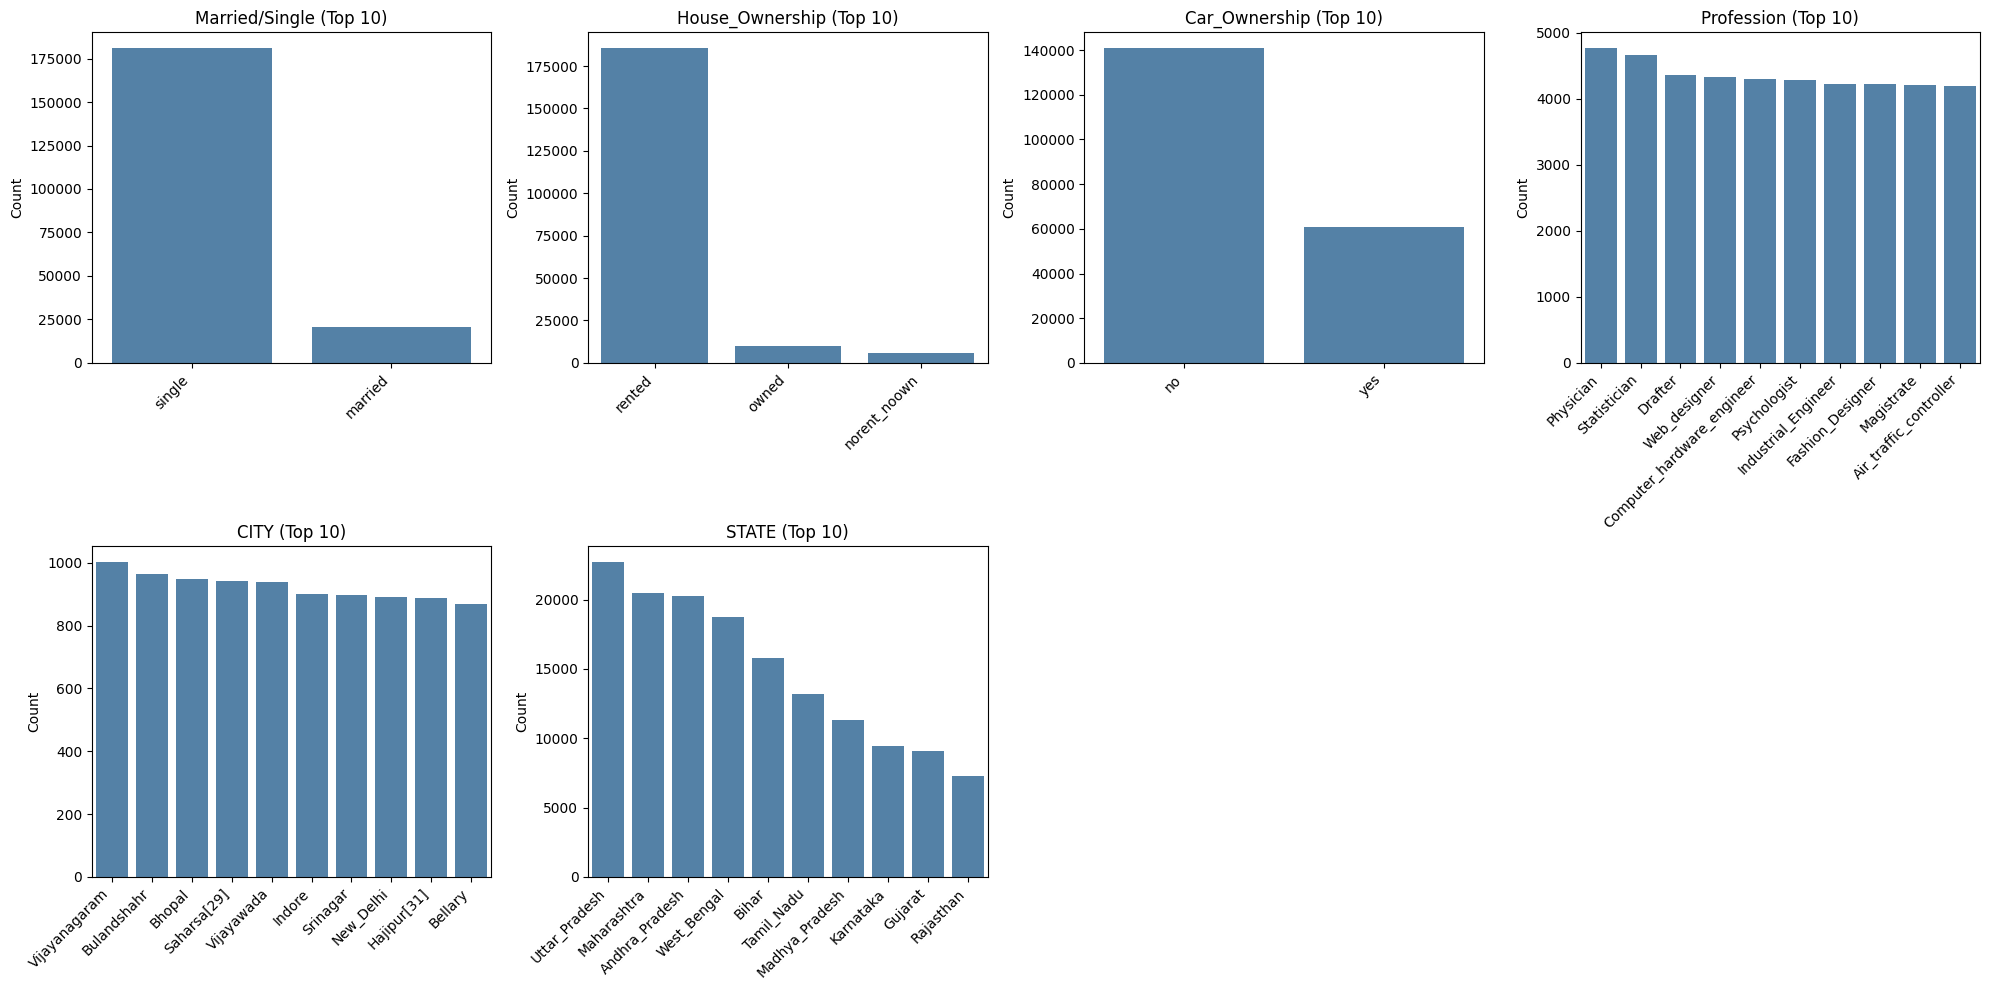

In [21]:
# Bar chart limited to top 10 categories
plot_categorical_summary(train_df[categorical_features], plot_type='bar', top_n=10, cols_per_row=4, figsize=(20, 5))

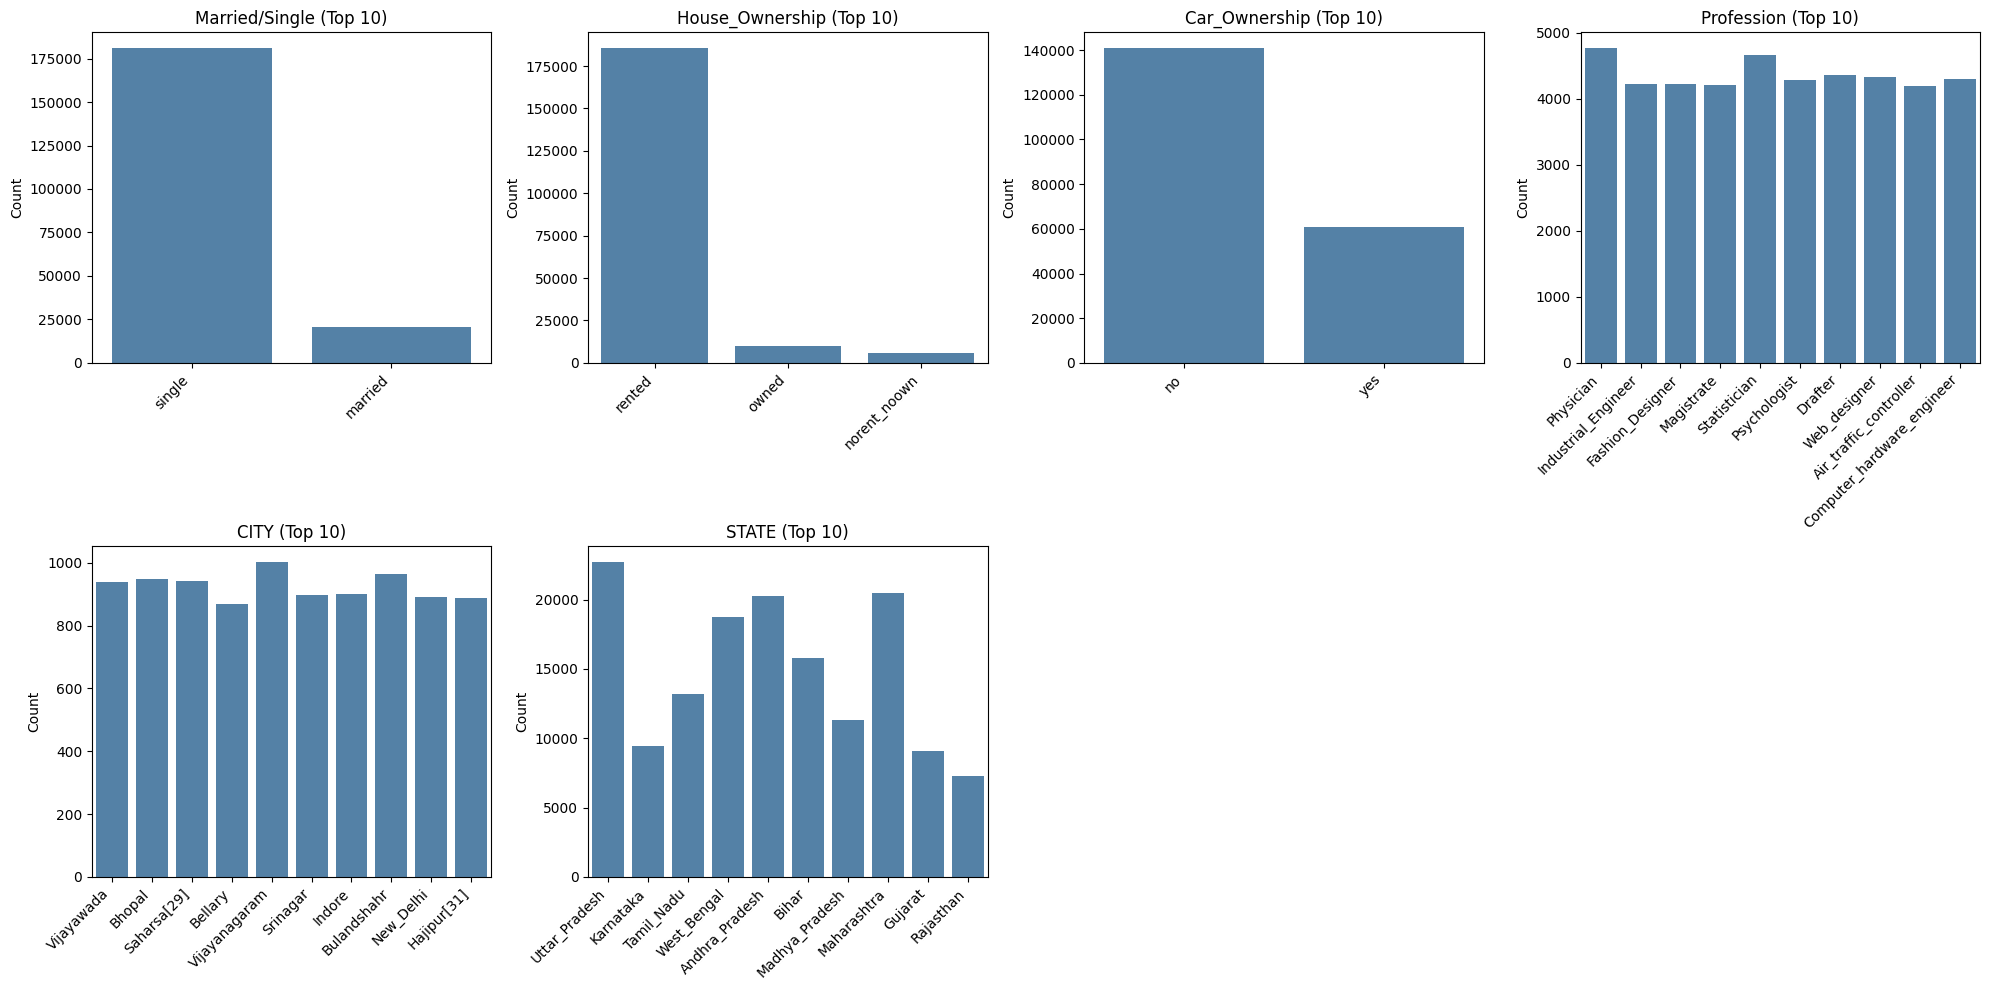

In [22]:
# Bar chart limited to top 5 categories
plot_categorical_summary(train_df[categorical_features], plot_type='count', top_n=10, cols_per_row=4, figsize=(20, 5))


## Bivariate Analysis

Goal: Understand relationships between two variables, especially with the target (Risk_Flag).

## 1 Numerical vs Target (Risk_Flag)

### Bivariate Analysis: Numerical Features vs Risk_Flag

Boxplot

Purpose: Show differences in distribution between risk groups.

Insight: Reveals median, spread (IQR), and outliers.

Violin Plot

Purpose: Display full distribution with density.

Insight: Highlights shape, symmetry, and multimodal patterns.

KDE/Histogram

Purpose: Overlay distributions for each class.

Insight: Shows class overlap, skewness, and separation.

In [23]:
def plot_numerical_vs_risk(df, numerical_features, plot_type='boxplot', target_col='Risk_Flag', cols=2):

    # Exclude the target column if mistakenly included in feature list
    num_features = [col for col in numerical_features if col != target_col]

    # Calculate number of rows needed based on number of numerical features and columns
    rows = -(-len(num_features) // cols)  # Ceiling division for row count
    plt.figure(figsize=(7 * cols, 5 * rows))  # Set figure size based on number of plots

    # Loop through all numerical features for comparison with Risk_Flag
    for idx, col in enumerate(num_features, 1):
        plt.subplot(rows, cols, idx)

        # Plot selection based on chosen plot type
        if plot_type == 'boxplot':
            sns.boxplot(x=target_col, y=col, data=df)
            plt.title(f'{col} vs {target_col} (Boxplot)')
        elif plot_type == 'violin':
            sns.violinplot(x=target_col, y=col, data=df, inner='quartile')
            plt.title(f'{col} vs {target_col} (Violin Plot)')
        elif plot_type == 'kde':
            for label in sorted(df[target_col].unique()):
                subset = df[df[target_col] == label]
                sns.kdeplot(subset[col], label=f'{target_col} = {label}', fill=True)
            plt.title(f'{col} vs {target_col} (KDE Plot)')
            plt.legend()
        elif plot_type == 'histogram':
            for label in sorted(df[target_col].unique()):
                subset = df[df[target_col] == label]
                sns.histplot(subset[col], label=f'{target_col} = {label}', stat='density', element='step', bins=30)
            plt.title(f'{col} vs {target_col} (Histogram)')
            plt.legend()
        else:
            raise ValueError("Invalid plot_type. Choose from: 'boxplot', 'violin', 'kde', 'histogram'.")

        plt.xlabel(col)
        plt.ylabel('Density' if plot_type in ['kde', 'histogram'] else col)

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()


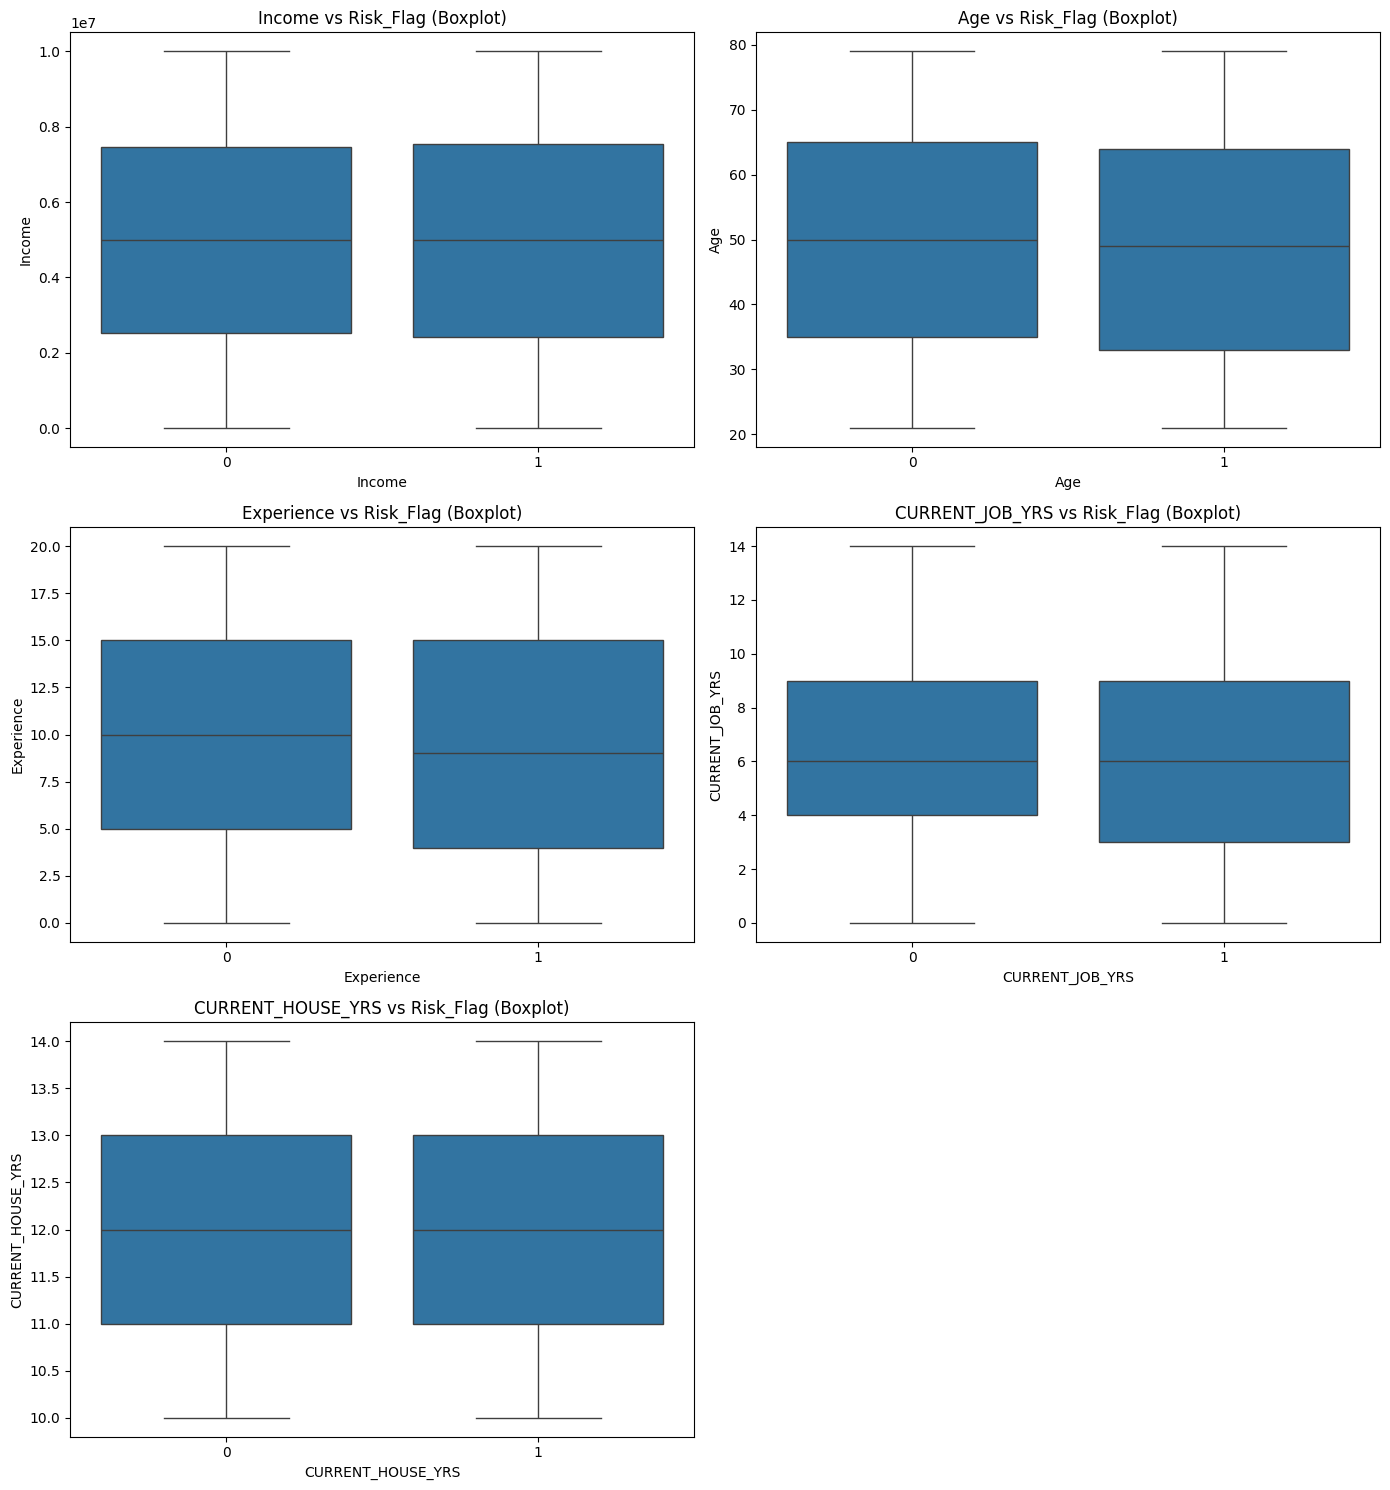

In [24]:
# Boxplots: Compare medians, spread, and outliers by risk
plot_numerical_vs_risk(train_df, numerical_features, plot_type='boxplot')

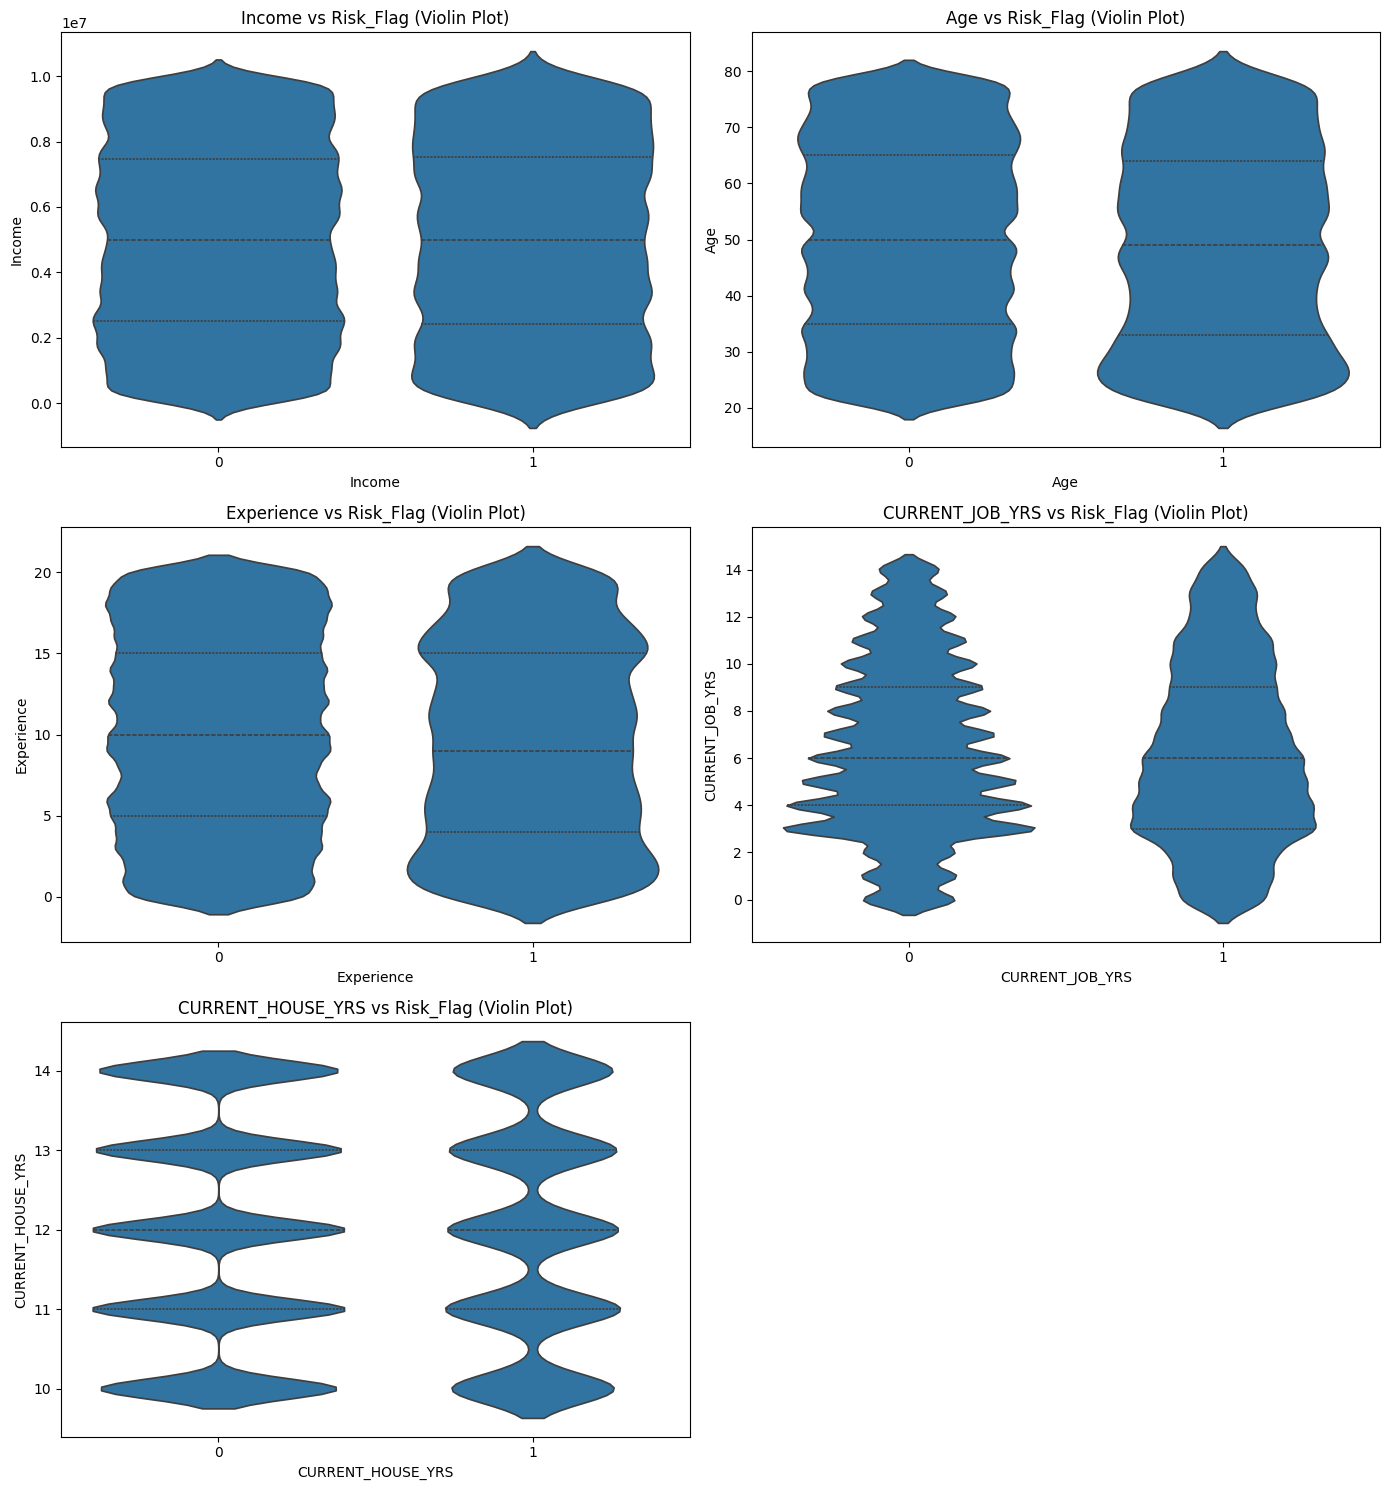

In [25]:
# Generate violin plots to compare the density and spread of numerical features across Risk_Flag values
plot_numerical_vs_risk(train_df, numerical_features, plot_type='violin')


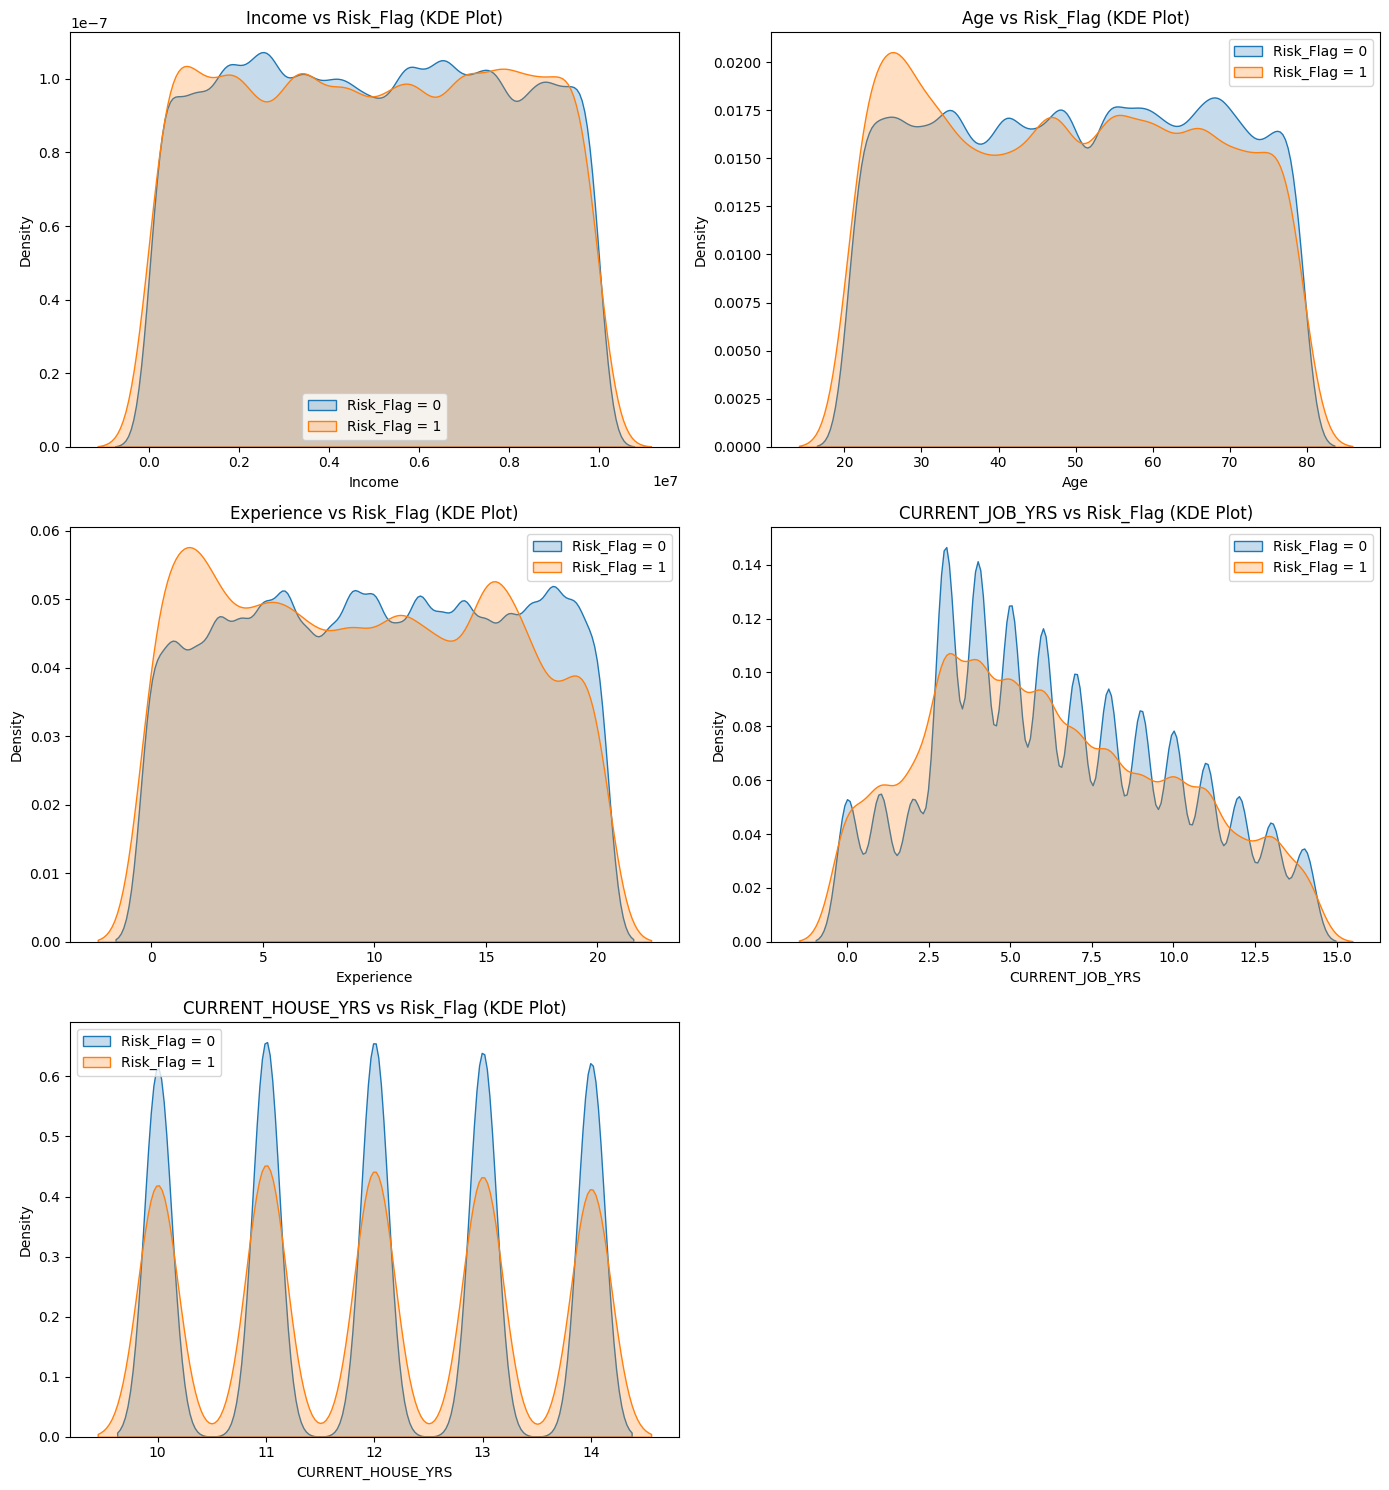

In [26]:
# Generate KDE plots to visualize the distribution and overlap of numerical features based on Risk_Flag
plot_numerical_vs_risk(train_df, numerical_features, plot_type='kde')

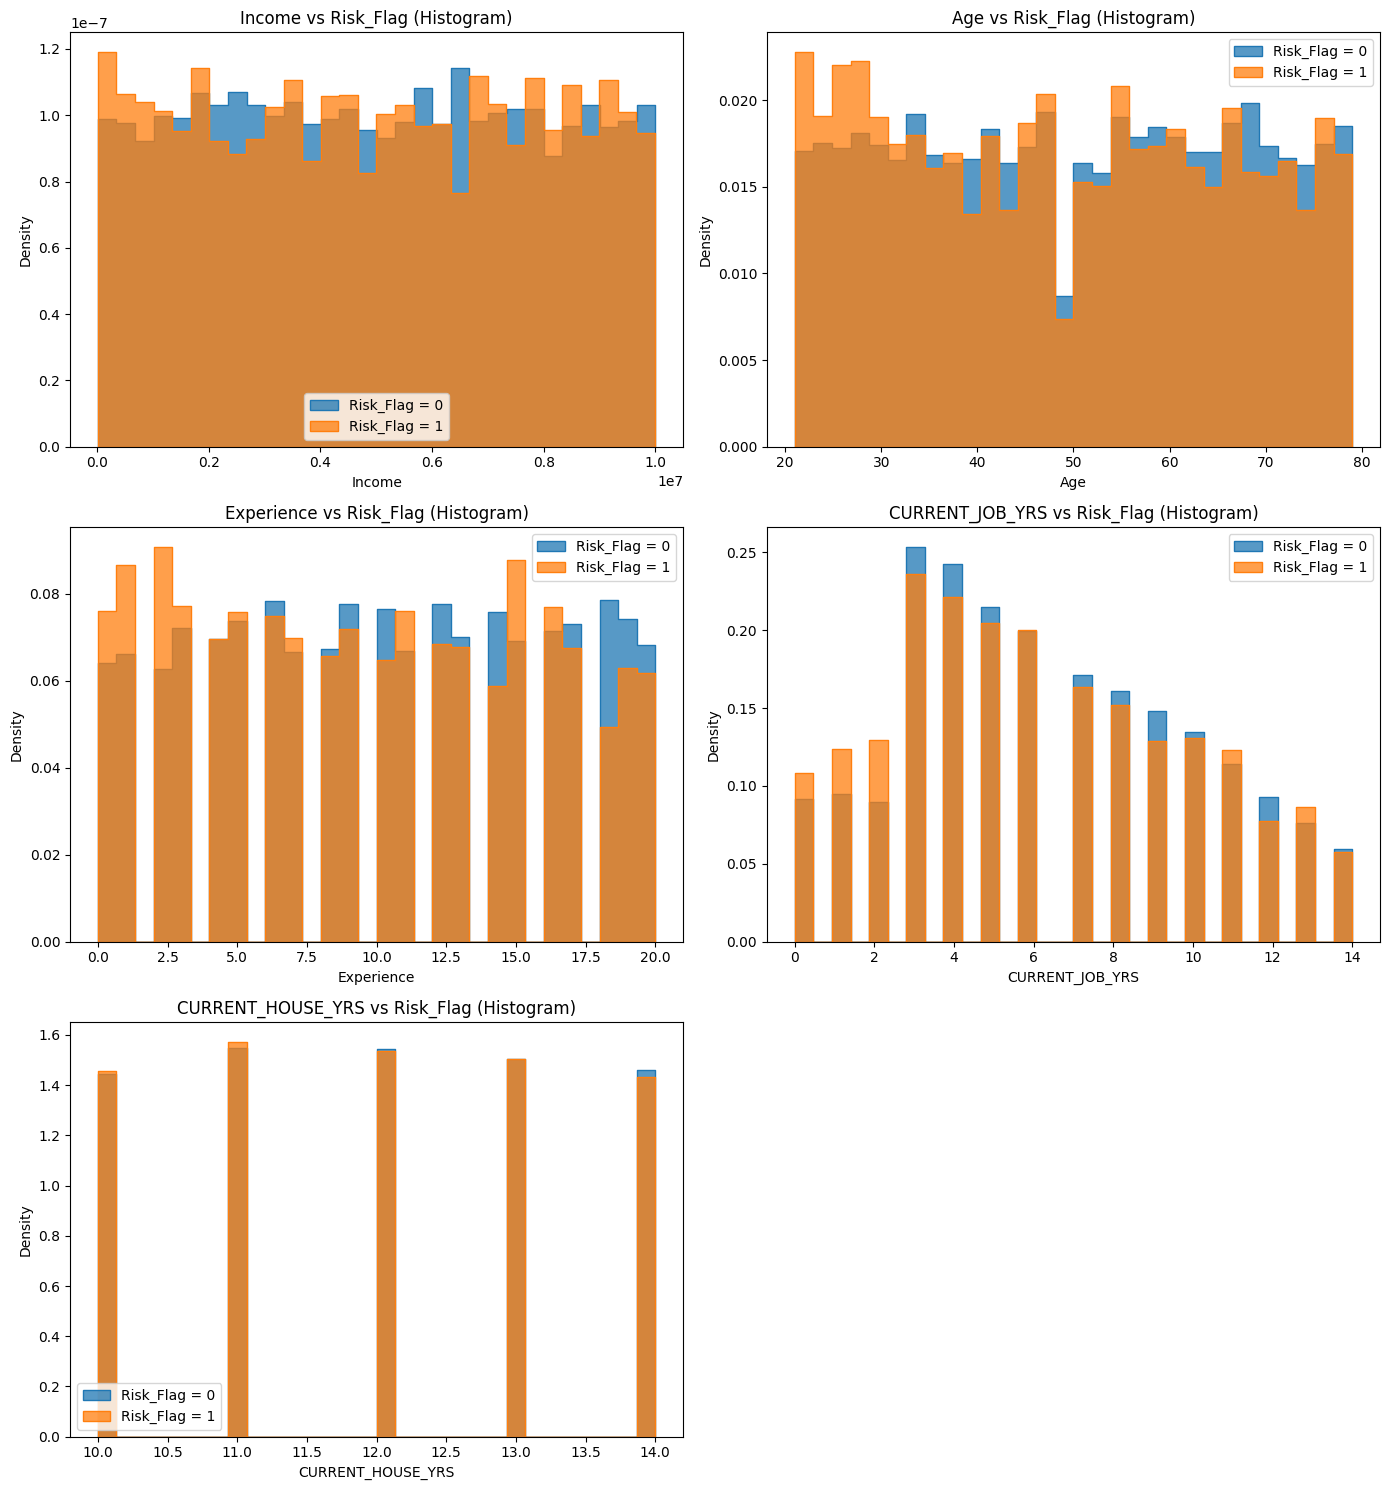

In [27]:
# Generate histograms to observe frequency distribution and density of numerical features for different Risk_Flag values
plot_numerical_vs_risk(train_df, numerical_features, plot_type='histogram')

## **2. Categorical Features vs Risk_Flag**


This analysis examines the relationship between categorical features (e.g., Married/Single, House_Ownership) and Risk_Flag.

### Stacked Bar Chart / Count Plot: Shows category distribution by risk class, highlighting differences between Risk_Flag = 0 and Risk_Flag = 1.

### Chi-square Test: Tests statistical dependence between features and Risk_Flag, identifying significant associations.

### Reason: Identifies features most linked to Risk_Flag, aiding model refinement.

In [28]:
def plot_stacked_bar_chart(df, categorical_features, target='Risk_Flag', figsize=(10, 6), top_n=10, columns_per_row=3):

    # Calculate the number of rows needed for the plots
    num_plots = len(categorical_features)
    rows = math.ceil(num_plots / columns_per_row)

    # Create subplots
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(columns_per_row * 5, rows * 5))

    # Flatten the axes array to make it easier to iterate
    axes = axes.flatten()

    # Loop through the categorical features and plot
    for i, column in enumerate(categorical_features):
        # Get the top N most frequent unique items in the column
        top_items = df[column].value_counts().head(top_n).index

        # Filter the DataFrame to include only the top N most frequent items
        df_filtered = df[df[column].isin(top_items)]

        # Plot on the respective axis
        sns.countplot(x=column, hue=target, data=df_filtered, ax=axes[i])
        axes[i].set_title(f"Top {top_n} {column} vs {target}")
        axes[i].tick_params(axis='x', rotation=45)

    # Turn off axes for any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


from scipy.stats import chi2_contingency

def chi_square_test(df, categorical_features, target='Risk_Flag'):

    for column in categorical_features:
        # Create a contingency table
        contingency_table = pd.crosstab(df[column], df[target])

        # Perform Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        print(f"Chi-square test for {column} vs {target}:")
        print(f"Chi-square Statistic: {chi2}")
        print(f"P-value: {p_value}")
        print(f"Degrees of Freedom: {dof}")
        print(f"Expected Frequencies:\n{expected}\n")

        # Check for significance (usually p < 0.05)
        if p_value < 0.05:
            print(f"Conclusion: The variable '{column}' is significantly associated with '{target}' (p-value < 0.05)\n")
        else:
            print(f"Conclusion: The variable '{column}' is NOT significantly associated with '{target}' (p-value >= 0.05)\n")



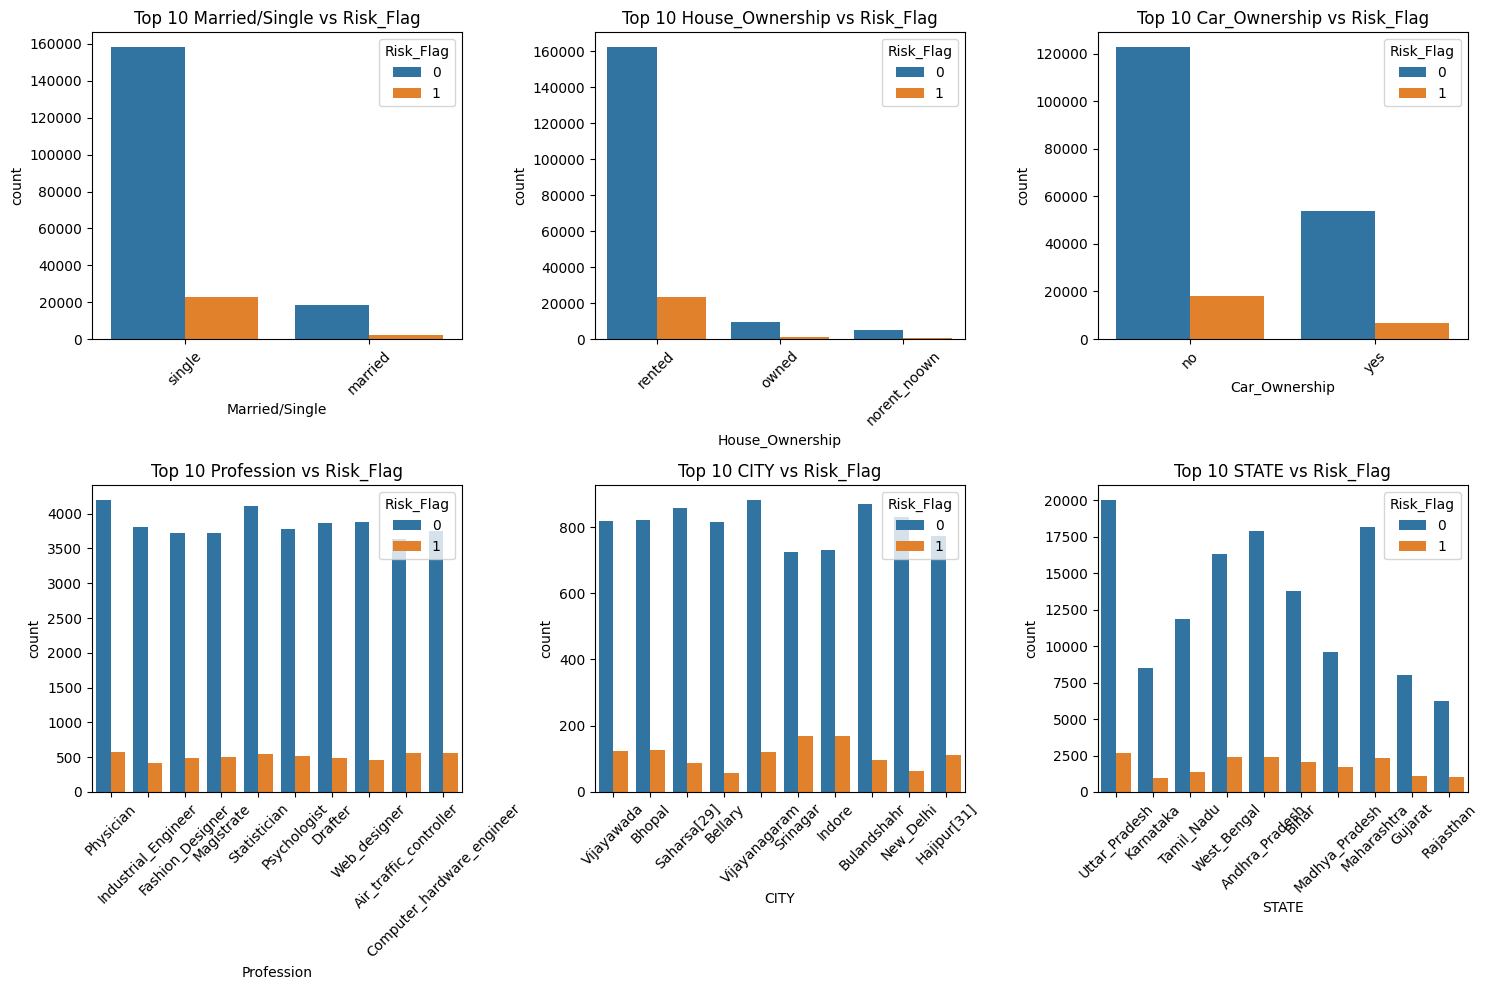

In [29]:
# Stacked barchart
plot_stacked_bar_chart(train_df, categorical_features, top_n=10)

In [30]:
chi_square_test(train_df, categorical_features)

Chi-square test for Married/Single vs Risk_Flag:
Chi-square Statistic: 82.34109181579083
P-value: 1.1451643114167654e-19
Degrees of Freedom: 1
Expected Frequencies:
[[ 18038.7897619   2525.2102381]
 [158805.2102381  22230.7897619]]

Conclusion: The variable 'Married/Single' is significantly associated with 'Risk_Flag' (p-value < 0.05)

Chi-square test for House_Ownership vs Risk_Flag:
Chi-square Statistic: 140.09008059155278
P-value: 3.8003667948667327e-31
Degrees of Freedom: 2
Expected Frequencies:
[[  5023.73803571    703.26196429]
 [  8993.07880952   1258.92119048]
 [162827.18315476  22793.81684524]]

Conclusion: The variable 'House_Ownership' is significantly associated with 'Risk_Flag' (p-value < 0.05)

Chi-square test for Car_Ownership vs Risk_Flag:
Chi-square Statistic: 107.24499279364126
P-value: 3.934033263452825e-25
Degrees of Freedom: 1
Expected Frequencies:
[[123577.63982143  17299.36017857]
 [ 53266.36017857   7456.63982143]]

Conclusion: The variable 'Car_Ownership' is si

## Key Findings:
All examined categorical variables show highly significant associations with Risk_Flag (p < 0.0001):

Marital Status: Strong association (χ²=82.34)

Home Ownership: Very strong association (χ²=140.09)

Car Ownership: Strong association (χ²=107.24)

Profession: Extremely strong association (χ²=505.74)

City: Most significant association (χ²=4256.34)

State: Very strong association (χ²=566.52)

Business Implications:
These demographic and socioeconomic factors are highly predictive of credit risk. The strongest predictors are geographic location (City) and professional background, suggesting these should be prioritized in risk modeling. All variables meet the threshold for statistical significance (p < 0.05) and practical significance (large chi-square values), confirming their relevance for credit risk assessment.

## 3. Numerical vs Numerical

- **Pair: Income vs Experience, Age vs CURRENT_JOB_YRS, etc.**
  - **Chart:** Scatter plot
  - **Purpose:** Detect linear or non-linear relationships between numerical features.
  
- **Same pair of variables**
  - **Chart:** Correlation heatmap
  - **Purpose:** Quantify the strength and direction of relationships between numerical variables.

**Reason:**  
Identifying relationships between numerical variables helps avoid multicollinearity in modeling and reveals hidden patterns that may influence predictions.


In [31]:
def plot_numerical_vs_numerical(df, numerical_columns, figsize=(15, 6)):

    num_cols = len(numerical_columns)
    # Calculate rows and columns for the subplot grid (3 plots per row)
    columns_per_row = 3
    rows = math.ceil(num_cols / columns_per_row)

    # Create subplots
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(columns_per_row * 5, rows * 5))
    axes = axes.flatten()

    # Scatter plots for pairs of numerical variables
    for i, col in enumerate(numerical_columns):
        for j in range(i + 1, len(numerical_columns)):
            sns.scatterplot(x=df[col], y=df[numerical_columns[j]], ax=axes[i], label=f'{col} vs {numerical_columns[j]}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(numerical_columns[j])
            axes[i].legend(title="Variable Pair", loc="upper right")

    # Turn off axes for unused plots
    for i in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    corr_matrix = df[numerical_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()



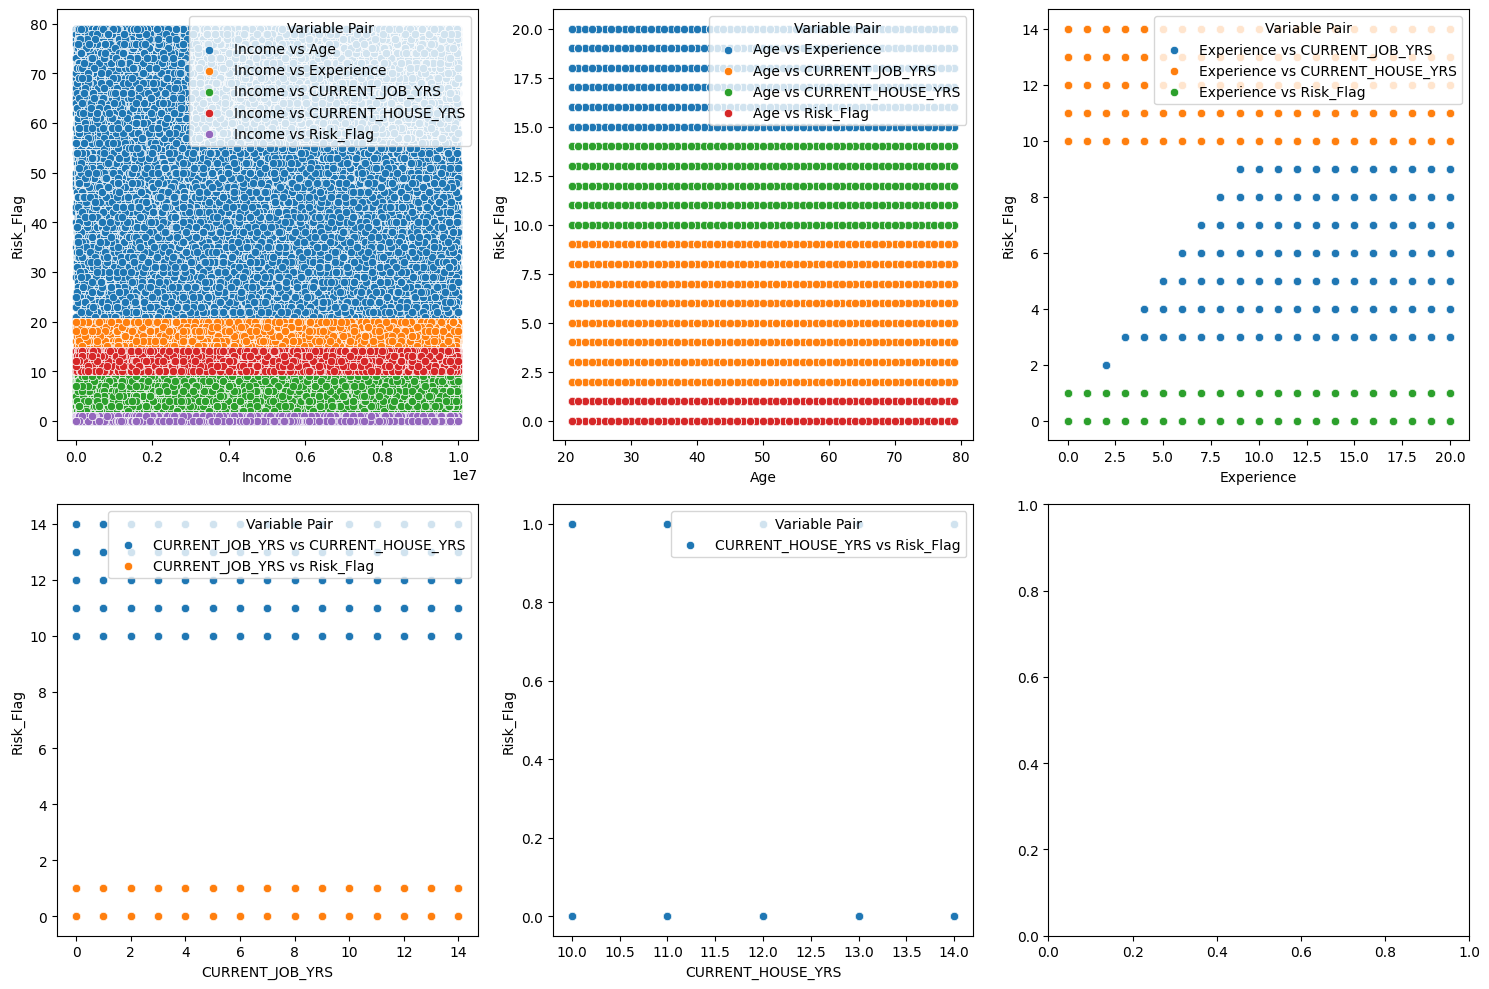

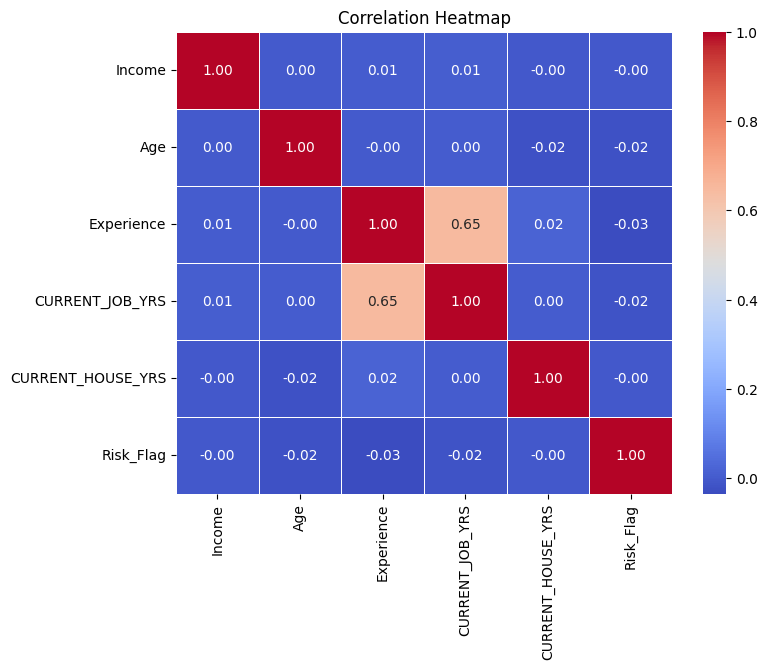

In [32]:
plot_numerical_vs_numerical(train_df, numerical_features)

### Categorical vs Categorical

- **Pair: House_Ownership vs Car_Ownership, Married/Single vs House_Ownership**
  - **Chart:** Clustered bar chart / Mosaic plot
  - **Purpose:** Understand co-occurrence or interactions between categorical variables.

**Reason:**  
Analyzing the relationship between pairs of categorical features helps identify patterns or dependencies, which can inform feature engineering and model improvement.


In [33]:
def plot_categorical_vs_categorical(df, categorical_cols, cols_per_row=3, top_n=10):

    num_cols = len(categorical_cols)
    num_plots = num_cols * (num_cols - 1) // 2  # Calculate the number of plots needed
    rows = math.ceil(num_plots / cols_per_row)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 5))
    axes = axes.flatten() if num_plots > 1 else [axes]  # Handle single plot case

    plot_index = 0  # Initialize plot index

    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            # Get top N unique items for both features
            top_items_x = df[categorical_cols[i]].value_counts().head(top_n).index
            top_items_y = df[categorical_cols[j]].value_counts().head(top_n).index

            # Filter DataFrame to include only top N items
            filtered_df = df[df[categorical_cols[i]].isin(top_items_x) &
                             df[categorical_cols[j]].isin(top_items_y)]

            sns.countplot(x=categorical_cols[i], hue=categorical_cols[j], data=filtered_df, ax=axes[plot_index])
            axes[plot_index].set_title(f'{categorical_cols[i]} vs {categorical_cols[j]} (Top {top_n})')
            axes[plot_index].tick_params(axis='x', rotation=45)

            plot_index += 1  # Increment plot index

    # Turn off axes for unused plots
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

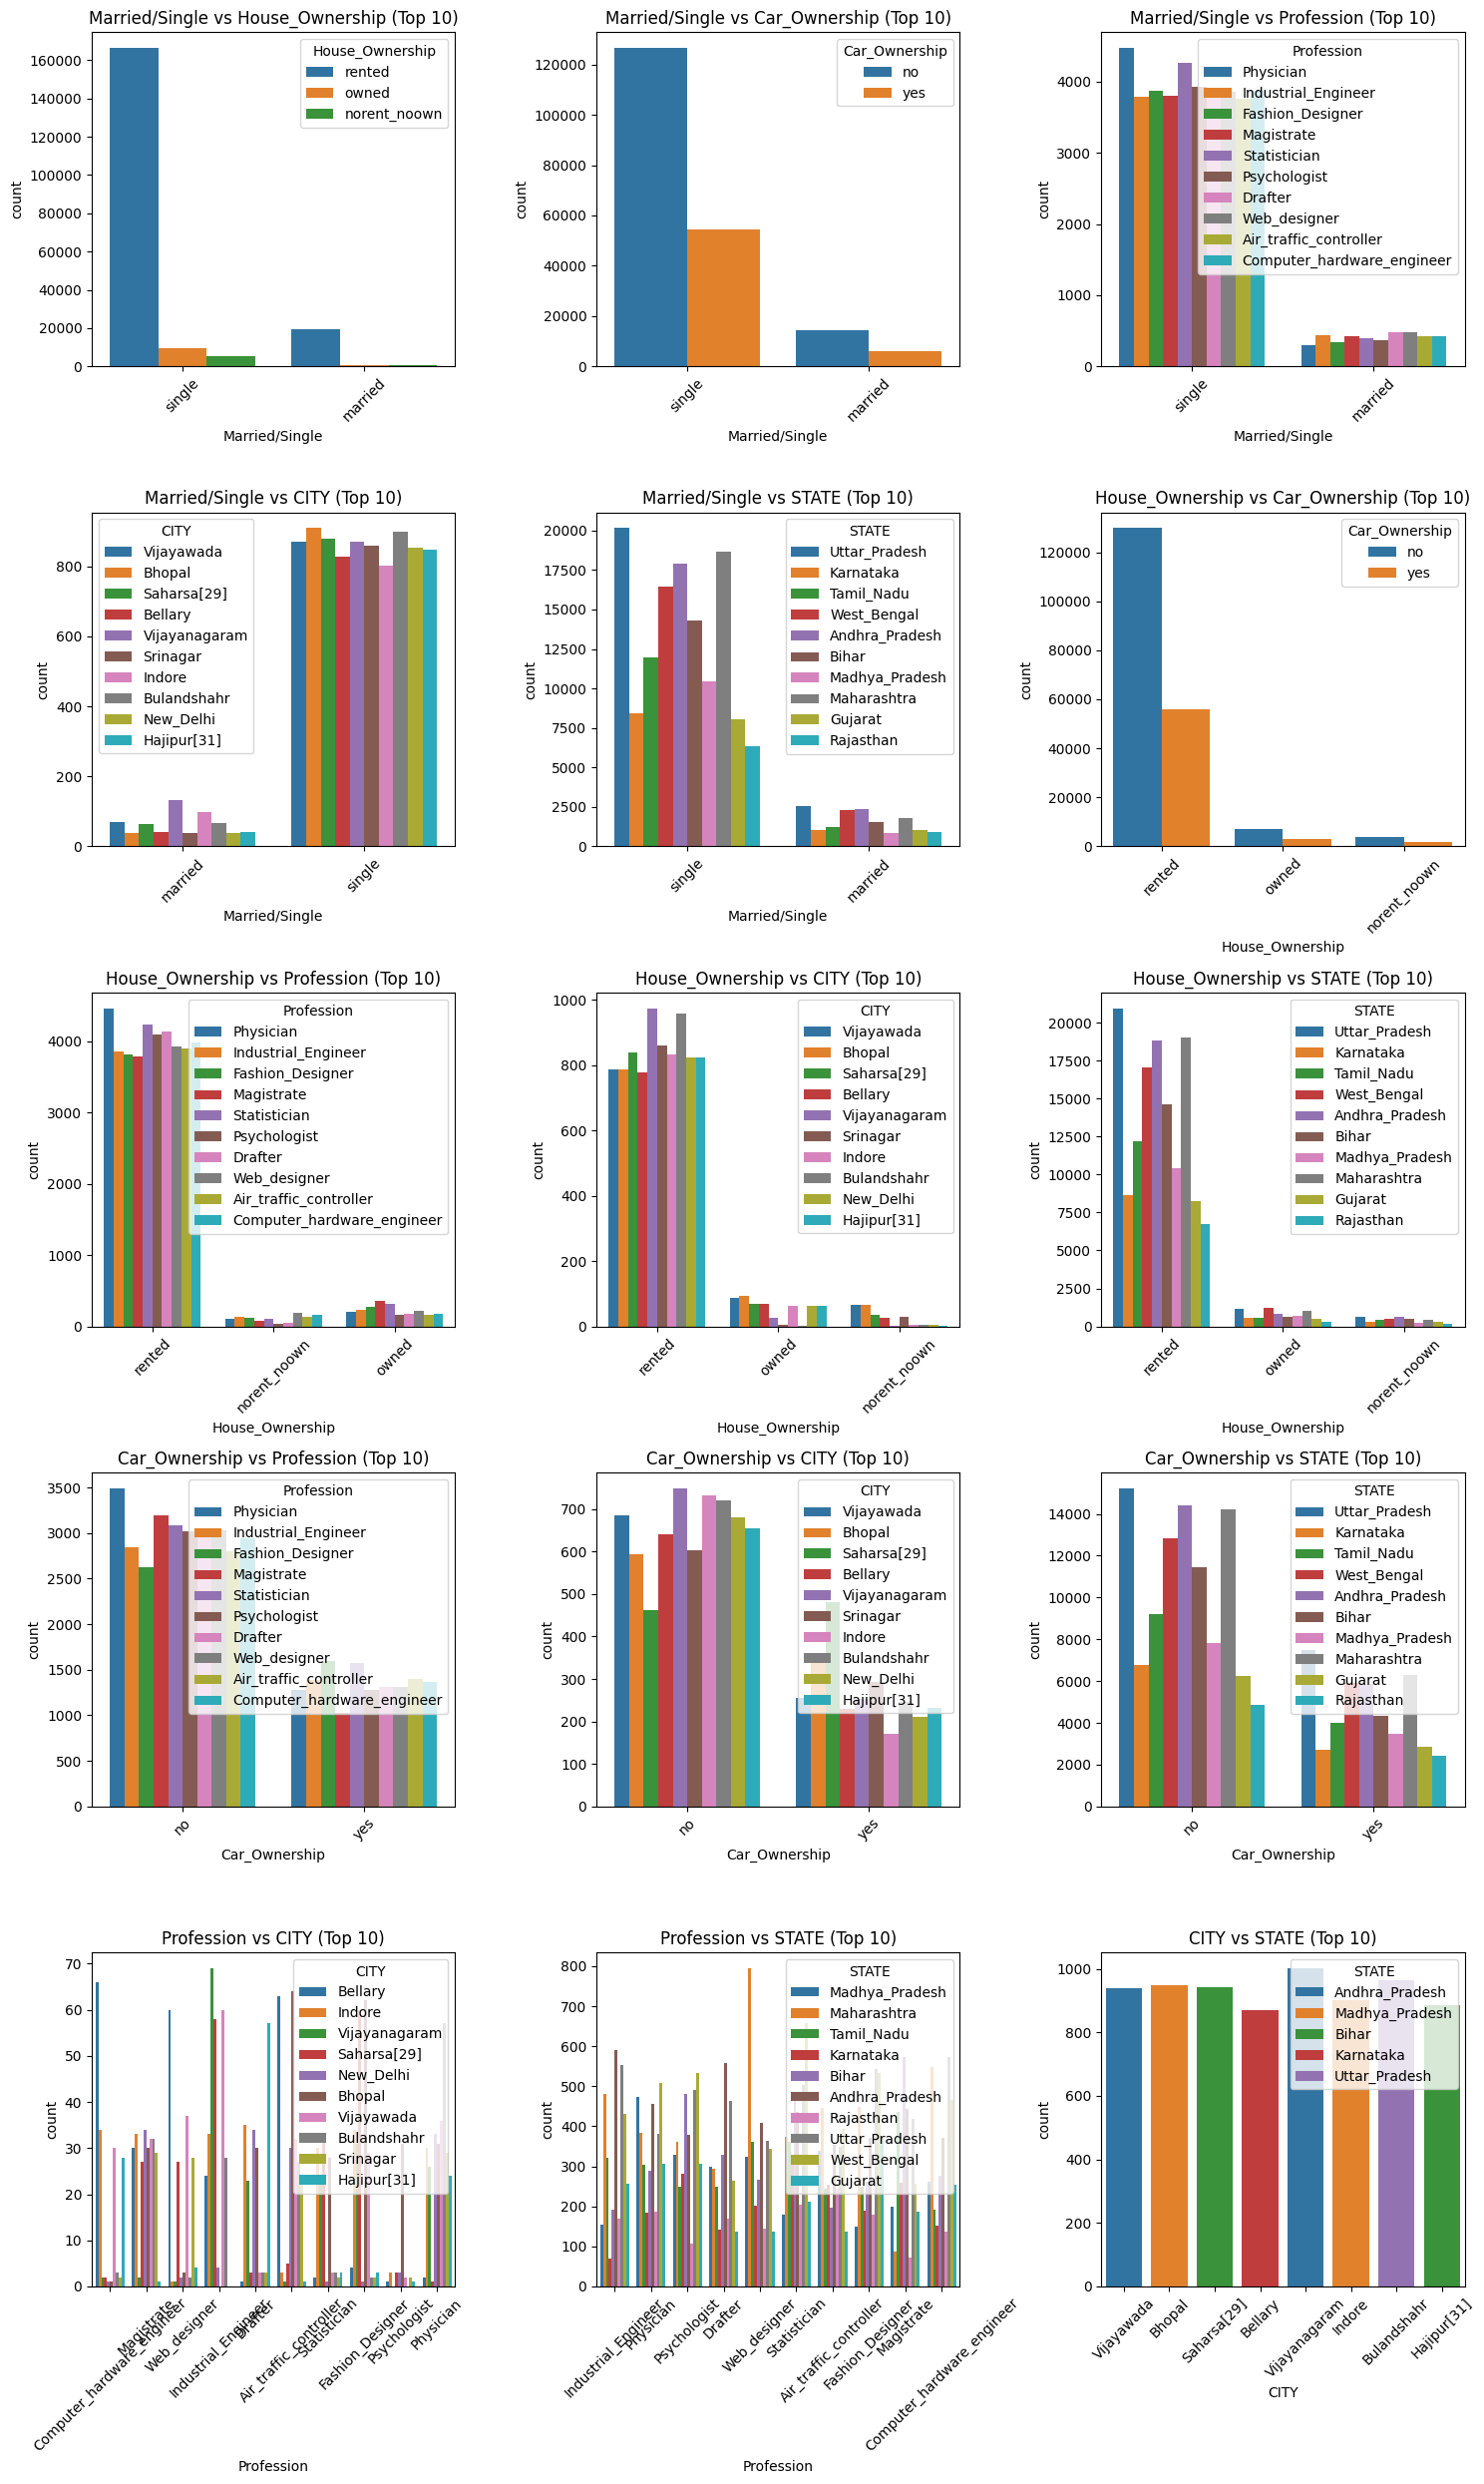

In [34]:
plot_categorical_vs_categorical(train_df, categorical_features)

## Multivariate Analysis




### 1. Numerical vs Numerical

- **Pair: Age, Income, Experience, CURRENT_JOB_YRS**  
  - **Chart:** Pair plot (hue=Risk_Flag)  
  - **Purpose:** Visualize multi-dimensional trends and clustering.

- **Same pair of variables**  
  - **Chart:** Correlation heatmap  
  - **Purpose:** Quantify the strength and direction of relationships.

**Reason:**  
Identifying relationships between numerical variables helps avoid multicollinearity in modeling and reveals hidden patterns that may influence predictions.


In [35]:
def plot_numerical_vs_numerical(df, numerical_columns, figsize=(15, 6)):

    num_cols = len(numerical_columns)
    # Calculate total number of scatter plots needed
    num_plots = num_cols * (num_cols - 1) // 2

    # Calculate rows and columns for the subplot grid (3 plots per row)
    cols_per_row = 3
    rows = math.ceil(num_plots / cols_per_row)

    # Create subplots with correct dimensions
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 5))
    axes = axes.flatten() if num_plots > 1 else [axes]  # Handle single plot case

    plot_index = 0  # Track subplot index
    for i in range(num_cols):
        for j in range(i + 1, num_cols):
            # Plot on the current subplot
            if plot_index < len(axes):  # Check if plot_index is within bounds
                sns.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], ax=axes[plot_index])
                axes[plot_index].set_xlabel(numerical_columns[i])
                axes[plot_index].set_ylabel(numerical_columns[j])
                axes[plot_index].set_title(f"{numerical_columns[i]} vs {numerical_columns[j]}")
                plot_index += 1  # Move to the next subplot
            else:
                break  # Stop if we've filled all subplots

    # Turn off axes for unused plots
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


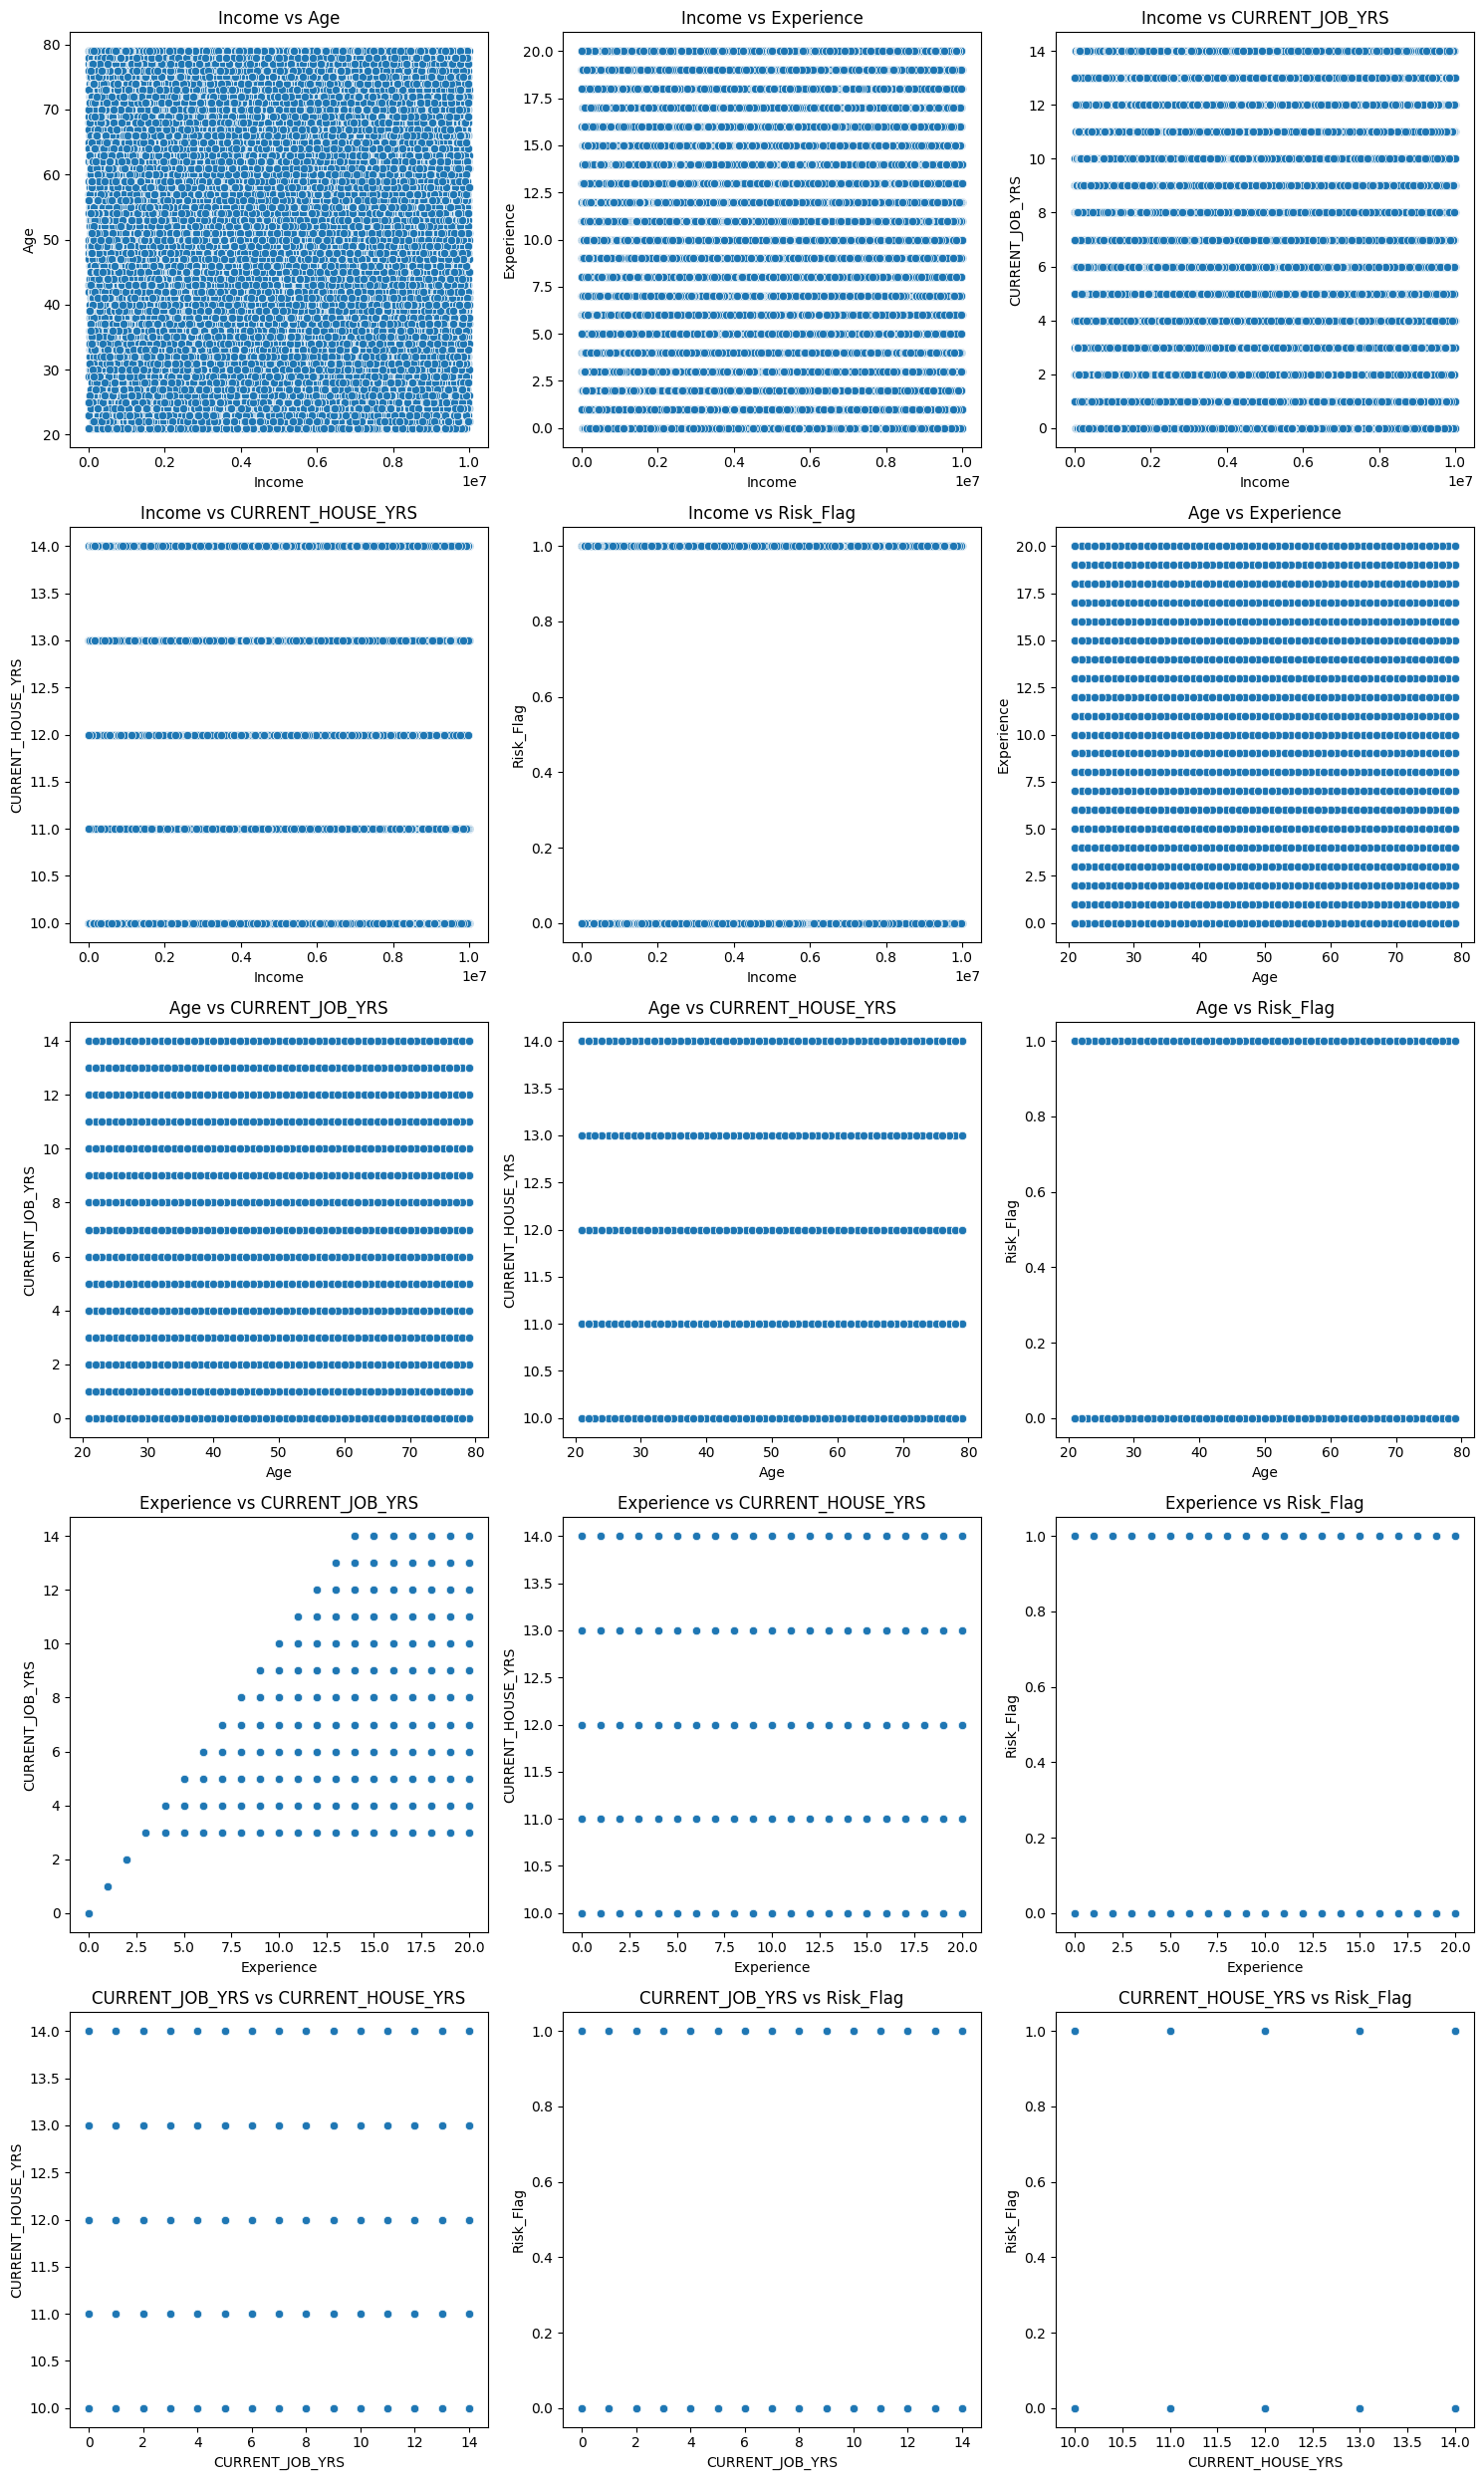

In [36]:
numerical_cols_to_plot = numerical_features
plot_numerical_vs_numerical(train_df, numerical_cols_to_plot)

### 2. Colored Heatmap / Correlation Matrix


In [37]:
def plot_correlation_heatmap(df, numerical_features, threshold=0.5, figsize=(10, 8)):

    # Step 1: Calculate the correlation matrix for numerical features
    corr_matrix = df[numerical_features].corr()

    # Step 2: Mask correlations below the threshold
    corr_matrix = corr_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)

    # Step 3: Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f',
                linewidths=0.5, mask=corr_matrix.isnull(), annot_kws={"size": 10})
    plt.title(f"Correlation Heatmap (threshold={threshold})", fontsize=16)
    plt.tight_layout()
    plt.show()



<ipython-input-37-d71c45bb8b80>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  corr_matrix = corr_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)


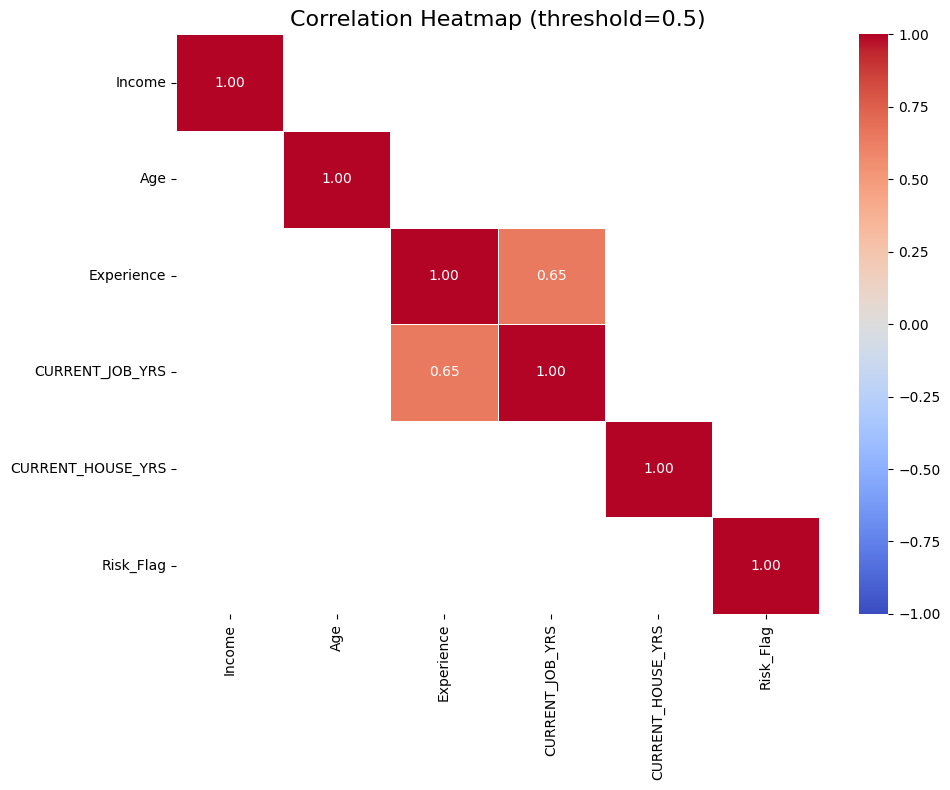

In [38]:
plot_correlation_heatmap(train_df, numerical_features, threshold=0.5)

### 3. Grouped Boxplots


In [39]:
def plot_grouped_boxplot(df, numerical_column, categorical_column, target='Risk_Flag', figsize=(12, 6)):

    plt.figure(figsize=figsize)
    sns.boxplot(x=categorical_column, y=numerical_column, hue=target, data=df)
    plt.title(f"{numerical_column} vs {target} grouped by {categorical_column}")
    plt.tight_layout()
    plt.show()


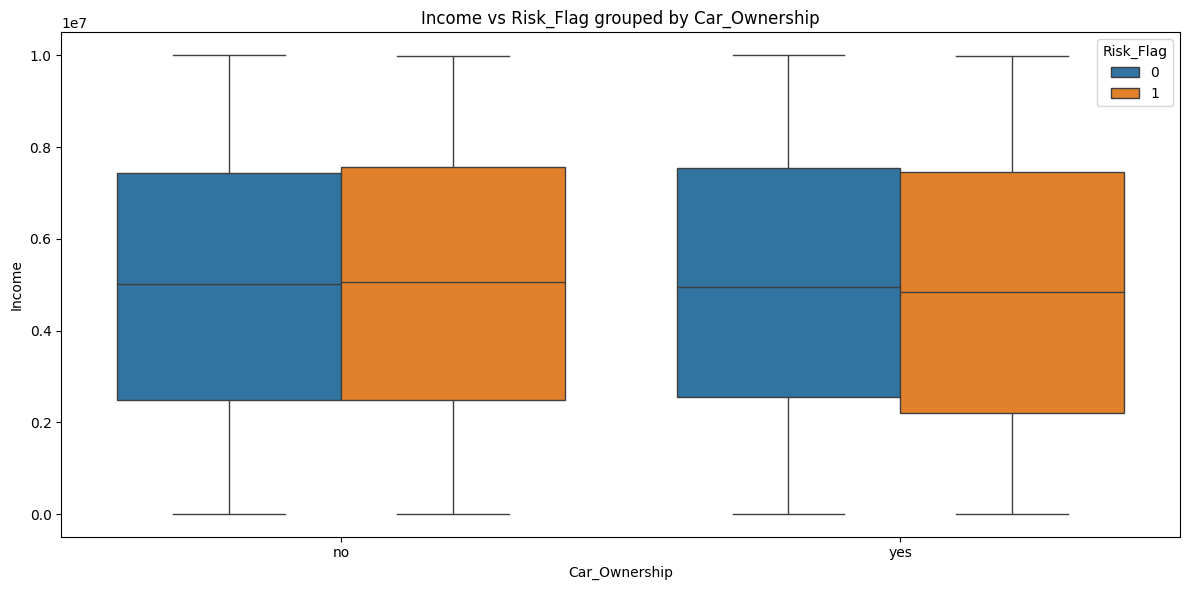

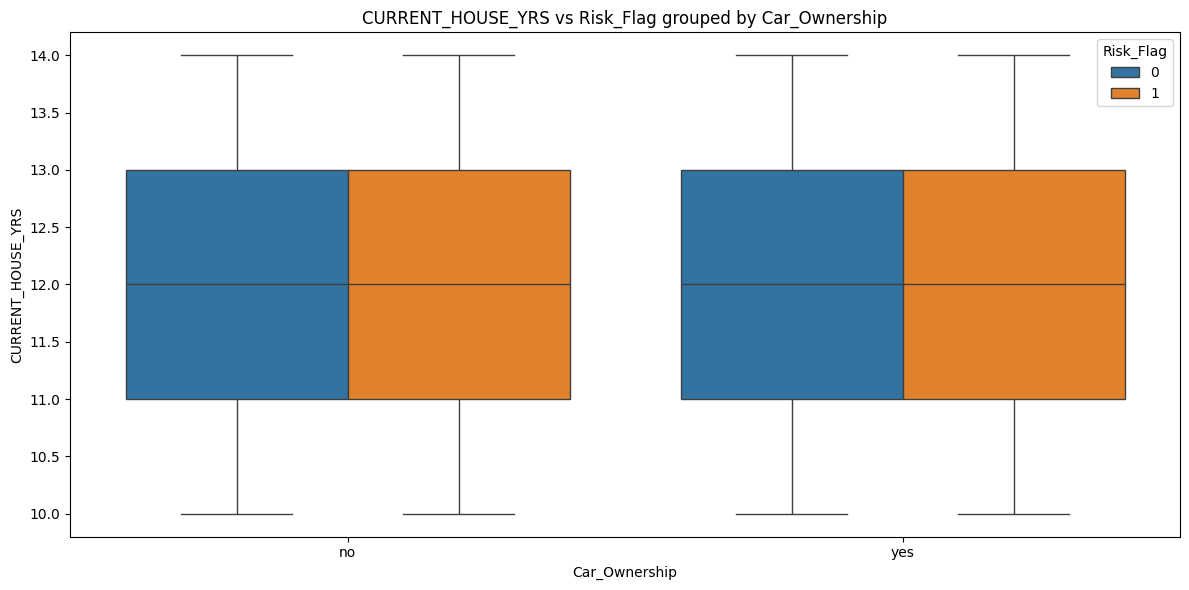

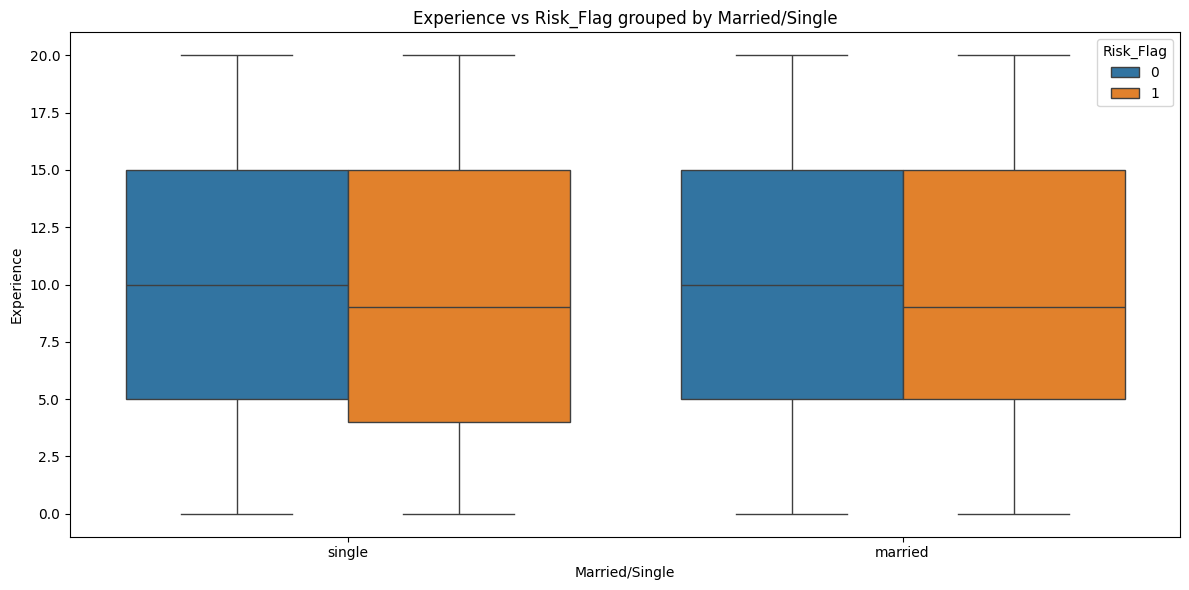

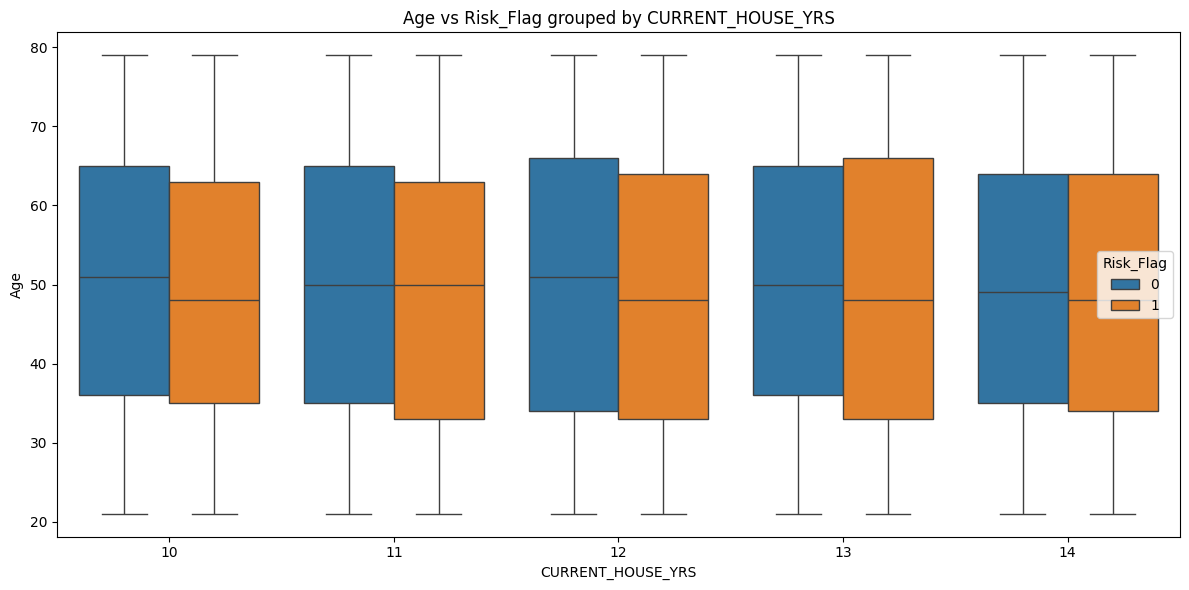

In [40]:
plot_grouped_boxplot(train_df, numerical_column='Income', categorical_column='Car_Ownership', target='Risk_Flag')
print("\n")
plot_grouped_boxplot(train_df, numerical_column='CURRENT_HOUSE_YRS', categorical_column='Car_Ownership', target='Risk_Flag')
print("\n")
plot_grouped_boxplot(train_df, numerical_column='Experience', categorical_column='Married/Single', target='Risk_Flag')
print("\n")
plot_grouped_boxplot(train_df, numerical_column='Age', categorical_column='CURRENT_HOUSE_YRS', target='Risk_Flag')

## 4. 3D Scatter or Heatmap: Age, Income, Risk_Flag
Columns: Age, Income, Risk_Flag

Chart: 3D Scatter Plot or 2D Heatmap

Purpose:

Visually detect clusters, patterns, or interactions among Age, Income, and the binary Risk_Flag.




In [41]:
def plot_multivariate(df, x_col, y_col, z_col='Risk_Flag', plot_type='3d'):
    if plot_type == '3d':
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(df[x_col], df[y_col], df[z_col], c=df[z_col], cmap='viridis')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        plt.colorbar(scatter)
        plt.title(f'3D Scatter Plot: {x_col}, {y_col}, {z_col}')
        plt.show()
    else:
        print("Invalid plot type. Choose '3d' or 'heatmap'.")

def plot_multivariate_grid(df, numerical_cols, target_col='Risk_Flag', cols_per_row=2):
    """Plots a grid of multivariate plots (3D scatter plots)."""

    num_plots = len(numerical_cols)
    num_rows = math.ceil(num_plots / cols_per_row)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows), subplot_kw={'projection': '3d'})
    axes = axes.flatten() if num_plots > 1 else [axes]

    for i in range(num_plots):
      if i < len(numerical_cols):
          x_col = numerical_cols[i]
          if i + 1 < len(numerical_cols):
              y_col = numerical_cols[i + 1]
          else:
              y_col = numerical_cols[0] # Wrap around if needed
          plot_multivariate(df, x_col, y_col, target_col)

    # Remove extra subplots if needed
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




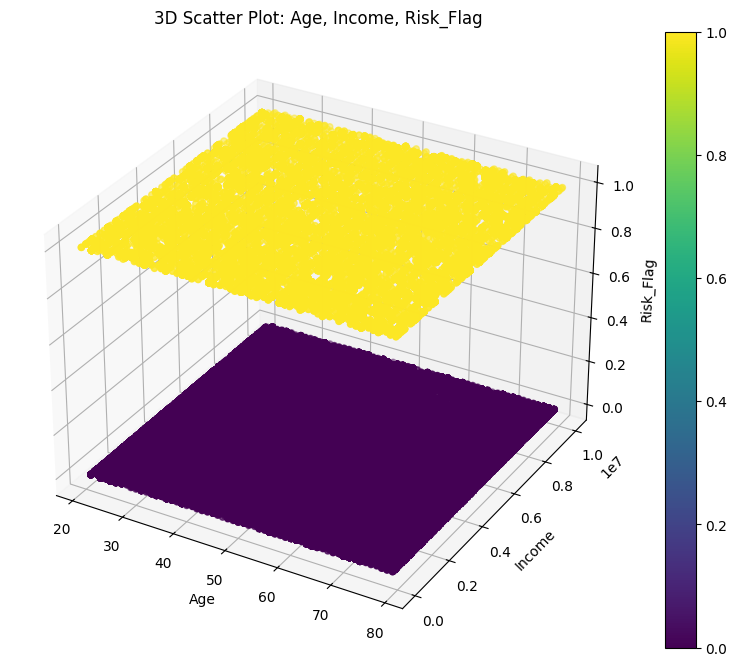

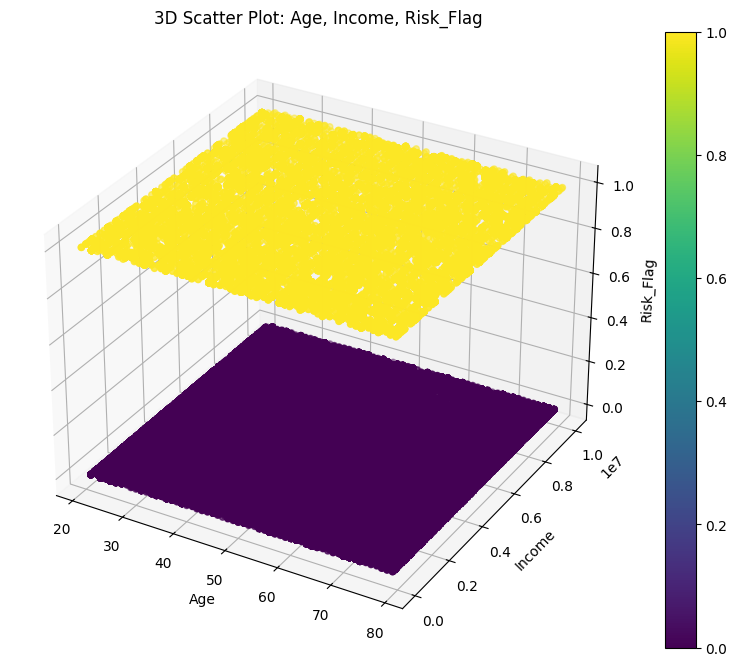

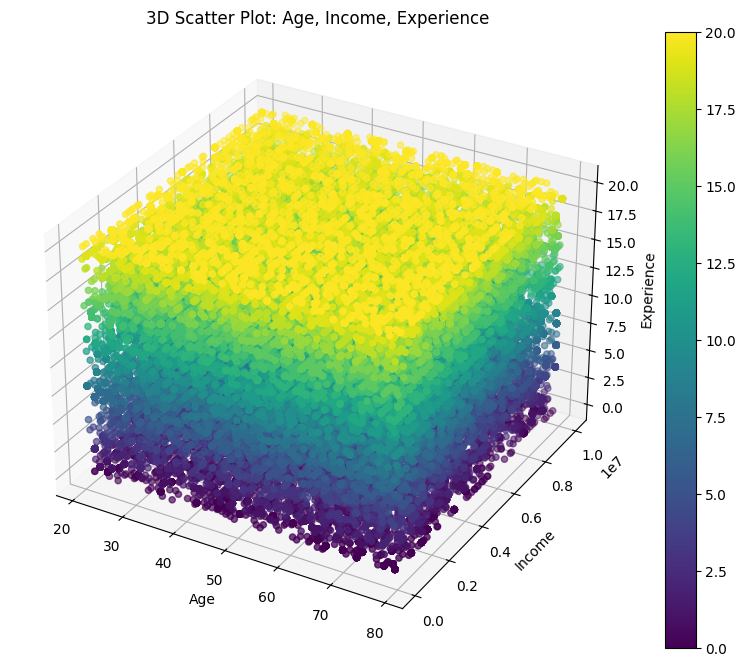

In [42]:
plot_multivariate(train_df, 'Age', 'Income')
print("\n")
plot_multivariate(train_df, 'Age', 'Income', z_col='Risk_Flag')
print("\n")
plot_multivariate(train_df, 'Age', 'Income', z_col='Experience')

# 📊 Insights From Visualization / EDA

## 🔍 Key Borrower Risk Insights for Lenders

---

### **1. Income & Risk Analysis**
- **Highest Risk Group:** Borrowers earning between **20,000–30,000** show a **32.5% risk rate** — a major red flag for lending.
- **Lowest Risk Group:** The **30,000–40,000** income segment has a **risk rate of just 1.7%**, making them ideal candidates.
- **Unexpected Trend:** Even very high-income earners (above **900,000**) still show **12% risk**, indicating that income alone does not guarantee creditworthiness.

---

### **2. Age, Experience & Employment Tenure**
- **Young Borrowers (18–24 years):** Display the **highest risk (17%)**, possibly due to lack of financial discipline or job instability.
- **Senior Borrowers (75+ years):** Exhibit the **lowest risk (5%)**, potentially due to accumulated assets or conservative borrowing behavior.
- **Experience Matters:**
  - **<3 years experience:** Borrowers have a **14–17% risk rate**.
  - **10+ years experience:** Risk drops to **10%**, suggesting that job stability contributes significantly to lower default risk.
  - **Current job years trend:** Borrowers with **less than 1 year** in current job are more likely to borrow, but there's a sharp decrease in borrowing frequency as tenure increases, hitting the lowest at **11 years**.

---

### **3. Lifestyle Risk Indicators**
- **Marital Status:**
  - **Single borrowers:** Show a **12.5% risk rate**.
  - **Married borrowers:** Safer at **10.3%**, indicating family stability may support financial reliability.
- **Housing Situation:**
  - **Renters:** Higher risk at **13.5%**.
  - **Homeowners:** Lower risk at **10.5%**, a strong credit signal.
- **Vehicle Ownership:**
  - **Non-owners:** Show **12.8% risk**.
  - **Car owners:** Slightly lower at **11.1%** — owning a vehicle may be correlated with financial discipline.

---

### **4. Professional Risk Differentiation**
- **High-Risk Professions:**
  - **Police (16.7%)**, **Military (15.6%)**, **Accountants (15.2%)**, and **Software Developers (14.7%)** carry above-average risk.
- **Low-Risk Professions:**
  - **Petroleum Engineers (8.4%)** and **Industrial Engineers (9.7%)** appear financially stable and reliable.

---

### **5. Geographic Risk Patterns**
- **Safest States:**
  - **Sikkim (4%)**, **Uttarakhand (7%)**, **Punjab (9%)**
- **Highest Risk Regions:**
  - **Manipur (21%)**, **Kerala (16%)**, **Tripura (16%)**
  - Indicates regional economic or social factors may play a role in default rates.

---

## 🚨 Dataset Imbalance Warning
- The dataset is **heavily imbalanced**, with:
  - **24,000+ high-risk cases**
  - Only **174,000+ low-risk cases**
- **Implication:** Without correction (e.g. SMOTE, stratified sampling), any ML model trained will be **biased** and overly optimistic in predicting low risk, compromising real-world utility.

---

## ✅ Business Recommendations for Lenders

### **Ideal Borrower Profile to Prioritize**
- **Middle-income earners** (30,000–40,000)
- **Married homeowners** with **10+ years of experience**
- **Senior age group** or **experienced professionals** in engineering
- Residents of **low-risk regions** like Sikkim, Uttarakhand, Punjab

### **Segments to Monitor or Apply Caution**
- **Young, inexperienced applicants**, especially under 25
- **Singles who rent**, or those without vehicle ownership
- **Borrowers in finance, military, or law enforcement roles**
- **Applicants from historically high-risk regions** like Manipur, Tripura, Kerala
- Any group with **<3 years of job experience** or frequent job changes


# 3. DATA CLEANING AND PREPROCESSING

### Check if there's missing Values

In [43]:
train_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [44]:
test_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

### Check for Invalid or Out-of-Range Values

In [45]:
def check_invalid_out_of_range_values(df):
    # Check for negative ages
    negative_ages = df[df["Age"] < 0]
    if not negative_ages.empty:
        print(f"Found {len(negative_ages)} rows with negative ages:")
        print(negative_ages)
    else:
        print("No negative ages found.")

    # Check for income above 1,000,000
    high_income = df[df["Income"] > 1_000_000_0]
    if not high_income.empty:
        print(f"Found {len(high_income)} rows with income above 1,000,000:")
        print(high_income)
    else:
        print("No income values above 1,000,0000 found.")


In [46]:
check_invalid_out_of_range_values(train_df)

No negative ages found.
No income values above 1,000,0000 found.


In [47]:
# Filter and check if income values seem too large
large_incomes = train_df[train_df["Income"] > 10000000]
print(f"Found {len(large_incomes)} rows with income greater than 1 million.")
print(large_incomes.head())

Found 0 rows with income greater than 1 million.
Empty DataFrame
Columns: [Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []


# 4. FEATURE SELECTION AND ENGINEERING

### Getting Mid Point of Ages

In [48]:
def group_ages_with_midpoints(df, age_col='Age', bin_size=10):

    # Define age bin edges
    min_age = df[age_col].min()
    max_age = df[age_col].max()
    bins = np.arange(min_age, max_age + bin_size, bin_size)

    # Create age labels (e.g., '20-30') and midpoints
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1] - 1) / 2 for i in range(len(bins)-1)]

    # Cut ages into groups
    df['Age_Group'] = pd.cut(df[age_col], bins=bins, labels=labels, include_lowest=True)
    df['Age_Midpoint'] = pd.cut(df[age_col], bins=bins, labels=midpoints, include_lowest=True)
    df['Age_Midpoint'] = df['Age_Midpoint'].astype(float)  # Ensure numeric type

    return df


In [49]:
#Train Set
train_df = group_ages_with_midpoints(train_df, age_col='Age', bin_size=10)

#Test Set
test_df = group_ages_with_midpoints(test_df, age_col='Age', bin_size=10)

# DELETE

In [50]:
# # Drop 'Age_Bin' and 'Income_Bin' if they exist
# if 'Age_Bin' in train_df.columns:
#     train_df = train_df.drop('Age_Bin', axis=1)
# if 'Income_Bin' in train_df.columns:
#     train_df = train_df.drop('Income_Bin', axis=1)

# if 'Age_Bin' in test_df.columns:
#     test_df = test_df.drop('Age_Bin', axis=1)
# if 'Income_Bin' in test_df.columns:
#     test_df = test_df.drop('Income_Bin', axis=1)

### ADDING FEATURES TO BOOST ALGORITHM

In [51]:
# --- Age Feature Engineering ---
def add_age_features(df):
    def age_group_to_midpoint(age_group):
        if isinstance(age_group, str) and '-' in age_group:
            start, end = map(int, age_group.split('-'))
            return (start + end) / 2
        return np.nan

    df['Age_Midpoint'] = df['Age_Group'].apply(age_group_to_midpoint).astype(float)

    age_bins = [20, 30, 45, 60, 80]
    age_labels = ['young_adult', 'mid_age_early', 'mid_age_late', 'senior_adult']
    df['Age_Category'] = pd.cut(df['Age_Midpoint'], bins=age_bins, labels=age_labels)

    return df

# --- Financial Health Features ---
def add_financial_features(df):
    epsilon = 1e-6
    df['Income_Age_Ratio'] = df['Income'] / (df['Age_Midpoint'] + epsilon)
    df['Income_Experience_Ratio'] = df['Income'] / (df['Experience'] + epsilon)

    df['Wealth_Index'] = (
        df['Income'] * df['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_Noown': 0}).fillna(0) +
        df['Car_Ownership'].map({'yes': 1, 'no': 0}).fillna(0)
    )
    return df

# --- Stability Features ---
def add_stability_features(df):
    df['Job_Stability'] = df['CURRENT_JOB_YRS'] / (df['Experience'] + 1)
    df['House_Stability_Score'] = df['CURRENT_HOUSE_YRS'] / (df['Age_Midpoint'] - 18 + 1)
    return df

# --- Career Stage Features ---
def add_career_stage(df):
    career_bins = [0, 5, 15, 50]
    career_labels = ['Early', 'Mid', 'Late']
    df['Career_Stage'] = pd.cut(df['Experience'], bins=career_bins, labels=career_labels, right=False)
    df['Career_Stage'] = df['Career_Stage'].cat.add_categories('Unknown').fillna('Unknown')
    return df

# --- Life Stage (Combined) ---
def add_life_stage(df):
    df['Life_Stage'] = df['Age_Category'].astype(str) + "_" + df['Career_Stage'].astype(str)
    return df

# --- Profession Grouping ---
def add_profession_group(df):
    profession_groups = {
        'tech': ['Software_Developer', 'Engineer', 'Scientist', 'Web_Designer'],
        'healthcare': ['Physician', 'Dentist', 'Nurse'],
        'education': ['Teacher', 'Professor', 'Librarian'],
        'services': ['Clerk', 'Receptionist', 'Waiter'],
        'finance': ['Accountant', 'Banker', 'Auditor'],
        'operations': ['Manager', 'Executive'],
    }

    prof_to_group = {prof: group for group, profs in profession_groups.items() for prof in profs}
    df['Profession_Group'] = df['Profession'].map(lambda p: prof_to_group.get(p, 'other'))
    return df

# --- Master Feature Engineering Pipeline ---
def feature_engineering(df):
    df = add_age_features(df)
    df = add_financial_features(df)
    df = add_stability_features(df)
    df = add_career_stage(df)
    df = add_life_stage(df)
    df = add_profession_group(df)
    return df


In [52]:
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

## Feature Engineering Summary

- **Age Midpoint**: Converts age groups (e.g., "21-30") into numeric midpoints (e.g., 25.5).  
- **Life Stage**: Categorizes age into stages like young adult, mid-age, senior.  
- **Income Ratios**: Calculates income-to-age and income-to-experience ratios.  
- **Wealth Index**: Combines income, home, and car ownership into a score.  
- **Job Stability**: Measures job consistency via current job years vs. experience.  
- **House Stability**: Relates housing years to age for lifestyle consistency.  
- **Career Stage**: Labels career phase as Early, Mid, or Late.  
- **Life + Career Stage**: Combines age group and career stage for deeper profiling.  
- **Profession Grouping**: Maps similar professions into broader, comparable categories.  
- **Purpose**: Adds human context, stability, and financial realism to raw features.


In [53]:
train_df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  4588175   49          20         single          rented            no   
1  6510821   31          15         single          rented            no   
2  9338129   26           7         single          rented            no   
3  8053436   42           8         single          rented            no   
4  3589662   42          18         single          rented           yes   

         Profession             CITY          STATE  CURRENT_JOB_YRS  ...  \
0         Secretary         Bilaspur   Chhattisgarh                6  ...   
1         Librarian         Amritsar         Punjab               12  ...   
2            Artist      Farrukhabad  Uttar_Pradesh                4  ...   
3              Chef  Mysore[7][8][9]      Karnataka                8  ...   
4  Technical_writer         Bareilly  Uttar_Pradesh               13  ...   

   Age_Midpoint  Age_Category Income_Age_Ratio  Income_Experience_Ratio  \
0          45.5  mid_age_late    100839.008773             2.294087e+05   
1          25.5   young_adult    255326.303713             4.340547e+05   
2          25.5   young_adult    366201.122894             1.334018e+06   
3          45.5  mid_age_late    176998.589517             1.006679e+06   
4          45.5  mid_age_late     78893.668596             1.994257e+05   

  Wealth_Index  Job_Stability  House_Stability_Score  Career_Stage  \
0          0.0       0.285714               0.385965          Late   
1          0.0       0.750000               1.176471          Late   
2          0.0       0.500000               1.647059           Mid   
3          0.0       0.888889               0.385965           Mid   
4          1.0       0.684211               0.456140          Late   

          Life_Stage  Profession_Group  
0  mid_age_late_Late             other  
1   young_adult_Late         education  
2    young_adult_Mid             other  
3   mid_age_late_Mid             other  
4  mid_age_late_Late             other  

[5 rows x 23 columns]

In [54]:
test_df.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  2687545   60           3         single          rented           yes   
1  9559493   77           3         single          rented            no   
2  5203215   51          19         single          rented            no   
3  7235618   78          16         single           owned            no   
4  4408094   30           8         single          rented           yes   

           Profession            CITY           STATE  CURRENT_JOB_YRS  ...  \
0    Technical_writer           Mango       Jharkhand                3  ...   
1        Army_officer           Sirsa         Haryana                3  ...   
2       Civil_servant     Hajipur[31]           Bihar                8  ...   
3              Artist  Tadepalligudem  Andhra_Pradesh               14  ...   
4  Petroleum_Engineer     Saharsa[29]           Bihar                4  ...   

   Age_Midpoint  Age_Category  Income_Age_Ratio Income_Experience_Ratio  \
0          55.5  mid_age_late      48424.233362            8.958480e+05   
1          75.5  senior_adult     126615.799647            3.186497e+06   
2          45.5  mid_age_late     114356.371113            2.738534e+05   
3          75.5  senior_adult      95835.998731            4.522261e+05   
4          25.5   young_adult     172866.424593            5.510117e+05   

   Wealth_Index  Job_Stability  House_Stability_Score  Career_Stage  \
0           1.0       0.750000               0.285714         Early   
1           0.0       0.750000               0.222222         Early   
2           0.0       0.400000               0.456140          Late   
3           0.0       0.823529               0.188034          Late   
4           1.0       0.444444               1.176471           Mid   

           Life_Stage Profession_Group  
0  mid_age_late_Early            other  
1  senior_adult_Early            other  
2   mid_age_late_Late            other  
3   senior_adult_Late            other  
4     young_adult_Mid            other  

[5 rows x 22 columns]

In [55]:
# prompt: Drop Age_Group in train_df and test_df

# Drop 'Age_Group' from train_df and test_df
train_df = train_df.drop(columns=['Age_Group'], errors='ignore')
test_df = test_df.drop(columns=['Age_Group'], errors='ignore')


## Splitting Data Set

In [56]:
train_X = train_df.drop(["Risk_Flag"], axis=1)
train_y = train_df["Risk_Flag"]

test_X = test_df

In [57]:
test_X.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0  2687545   60           3         single          rented           yes   
1  9559493   77           3         single          rented            no   
2  5203215   51          19         single          rented            no   
3  7235618   78          16         single           owned            no   
4  4408094   30           8         single          rented           yes   

           Profession            CITY           STATE  CURRENT_JOB_YRS  ...  \
0    Technical_writer           Mango       Jharkhand                3  ...   
1        Army_officer           Sirsa         Haryana                3  ...   
2       Civil_servant     Hajipur[31]           Bihar                8  ...   
3              Artist  Tadepalligudem  Andhra_Pradesh               14  ...   
4  Petroleum_Engineer     Saharsa[29]           Bihar                4  ...   

   Age_Midpoint  Age_Category Income_Age_Ratio  Income_Experience_Ratio  \
0          55.5  mid_age_late     48424.233362             8.958480e+05   
1          75.5  senior_adult    126615.799647             3.186497e+06   
2          45.5  mid_age_late    114356.371113             2.738534e+05   
3          75.5  senior_adult     95835.998731             4.522261e+05   
4          25.5   young_adult    172866.424593             5.510117e+05   

   Wealth_Index  Job_Stability  House_Stability_Score  Career_Stage  \
0           1.0       0.750000               0.285714         Early   
1           0.0       0.750000               0.222222         Early   
2           0.0       0.400000               0.456140          Late   
3           0.0       0.823529               0.188034          Late   
4           1.0       0.444444               1.176471           Mid   

           Life_Stage Profession_Group  
0  mid_age_late_Early            other  
1  senior_adult_Early            other  
2   mid_age_late_Late            other  
3   senior_adult_Late            other  
4     young_adult_Mid            other  

[5 rows x 21 columns]

In [58]:
print(train_X.shape, train_y.shape, test_X.shape)

(201600, 21) (201600,) (50400, 21)


### Heatmap with new added features

In [59]:
def encode_categorical(df):

    df_copy = df.copy()
    encoded_cols = []
    for col in df_copy.select_dtypes(include=['object', 'category']):
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
        encoded_cols.append(col)
    return df_copy, encoded_cols

def compute_correlation_matrix(df, method='pearson'):
    numeric_df = df.select_dtypes(include=[np.number])
    return numeric_df.corr(method=method)

def plot_correlation_heatmap(df, title="Correlation Heatmap", figsize=(12, 8), annot=True):

    corr = compute_correlation_matrix(df)
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=annot, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()


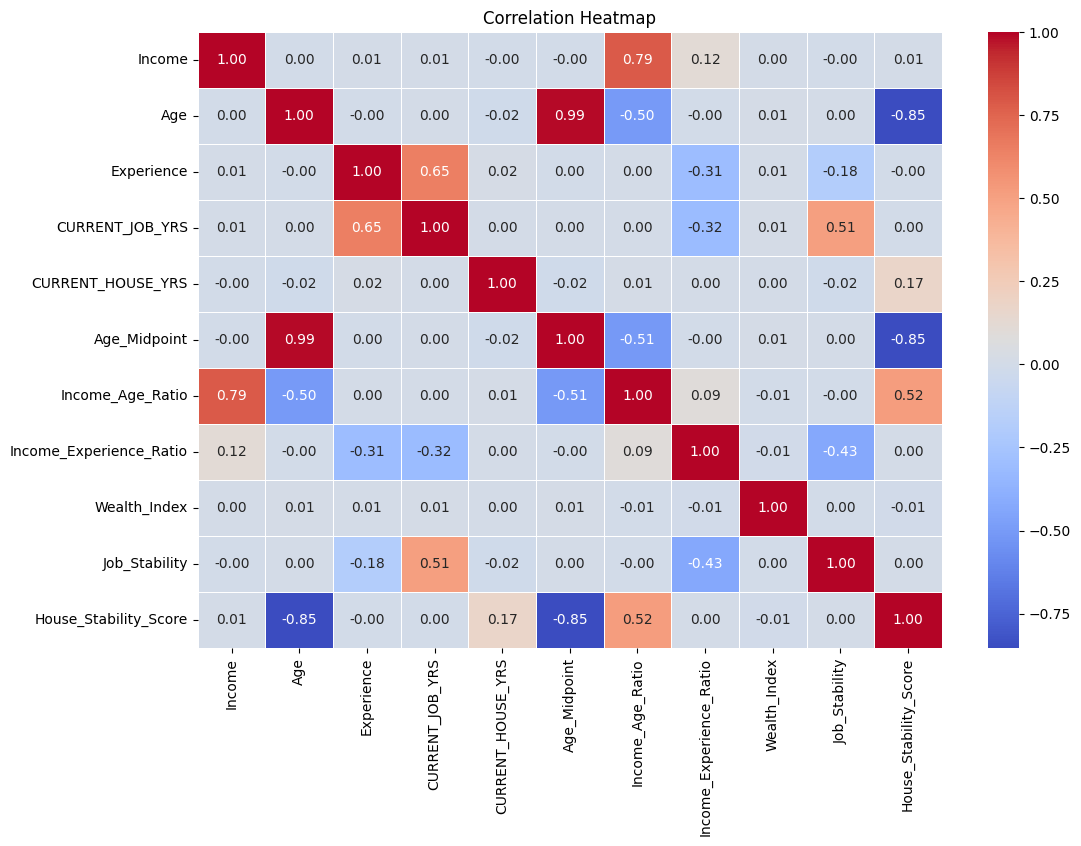

In [60]:
plot_correlation_heatmap(train_X)

### Spliting Train Set Into Train Set and Test Set

In [61]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, test_X.shape )

(161280, 21) (40320, 21) (161280,) (40320,) (50400, 21)


### Encoding Categorical Features for Train and Test Set

In [63]:
def encode_binary_features(train_set, test_set, binary_cols):
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, dtype=np.int64)
    train_set[binary_cols] = oe.fit_transform(train_set[binary_cols])
    if test_set is not None:
        test_set[binary_cols] = oe.transform(test_set[binary_cols])
    return train_set, test_set


def encode_high_cardinality(train_set, test_set, high_card_cols):
    if 'Risk_Flag' in train_set.columns:
        te = TargetEncoder(cols=high_card_cols, smoothing=5)
        train_set[high_card_cols] = te.fit_transform(train_set[high_card_cols], train_set['Risk_Flag'])[high_card_cols]
        if test_set is not None:
            test_set[high_card_cols] = te.transform(test_set[high_card_cols])[high_card_cols]
    else:
        be = BinaryEncoder(cols=high_card_cols, return_df=True)
        train_encoded = be.fit_transform(train_set[high_card_cols])
        for col in high_card_cols:
            encoded_cols = [c for c in train_encoded.columns if c.startswith(col)]
            train_set[col] = train_encoded[encoded_cols[0]]
            if test_set is not None:
                test_encoded = be.transform(test_set[high_card_cols])
                test_set[col] = test_encoded[encoded_cols[0]]
    return train_set, test_set


def encode_medium_cardinality(train_set, test_set, medium_card_cols):
    be = BinaryEncoder(cols=medium_card_cols, return_df=True)
    train_encoded = be.fit_transform(train_set[medium_card_cols])
    for col in medium_card_cols:
        encoded_cols = [c for c in train_encoded.columns if c.startswith(col)]
        train_set[col] = train_encoded[encoded_cols[0]]
        if test_set is not None:
            test_encoded = be.transform(test_set[medium_card_cols])
            test_set[col] = test_encoded[encoded_cols[0]]
    return train_set, test_set


def encode_ordinal_features(train_set, test_set, ordinal_mappings):
    for col, order in ordinal_mappings.items():
        if col in train_set.columns:
            oe = OrdinalEncoder(
                categories=[order],
                handle_unknown='use_encoded_value',
                unknown_value=-1,
                dtype=np.int64
            )
            train_set[col] = oe.fit_transform(train_set[[col]].astype(str))
            if test_set is not None and col in test_set.columns:
                test_set[col] = oe.transform(test_set[[col]].astype(str))
    return train_set, test_set


def encode_category_data(train_set, test_set=None):
    train_set = train_set.copy()
    test_set = test_set.copy() if test_set is not None else None

    # Binary Features
    binary_cols = ['Married/Single', 'Car_Ownership', 'Wealth_Index']
    train_set, test_set = encode_binary_features(train_set, test_set, binary_cols)

    # High Cardinality Features
    high_card_cols = ['Profession', 'CITY', 'STATE']
    train_set, test_set = encode_high_cardinality(train_set, test_set, high_card_cols)

    # Medium Cardinality Features
    medium_card_cols = ['House_Ownership', 'Profession_Group']
    train_set, test_set = encode_medium_cardinality(train_set, test_set, medium_card_cols)

    # Ordinal Features
    ordinal_mappings = {
        'Career_Stage': [0, 1, 2],
        'Age_Category': ['0', '1', '2', '3'],
        'Life_Stage': [str(i) for i in range(12)],
        'CURRENT_JOB_YRS': [str(i) for i in range(15)],
        'CURRENT_HOUSE_YRS': [str(i) for i in range(11, 15)],
        'House_Stability_Score': [str(i) for i in range(30)],
        'Job_Stability': [str(i) for i in range(106)]
    }
    train_set, test_set = encode_ordinal_features(train_set, test_set, ordinal_mappings)

    return (train_set, test_set) if test_set is not None else train_set


In [64]:
# Assuming `X_train`, `X_test`, and `test_X` are your datasets

# Step 1: Binary Features Encoding
binary_cols = ['Married/Single', 'Car_Ownership', 'Wealth_Index']
X_train, X_test = encode_binary_features(X_train, X_test, binary_cols)

# Step 2: High Cardinality Features Encoding (with Risk_Flag)
high_card_cols = ['Profession', 'CITY', 'STATE']
X_train, X_test = encode_high_cardinality(X_train, X_test, high_card_cols)

# Step 3: Medium Cardinality Features Encoding
medium_card_cols = ['House_Ownership', 'Profession_Group']
X_train, X_test = encode_medium_cardinality(X_train, X_test, medium_card_cols)

# Step 4: Ordinal Features Encoding
ordinal_mappings = {
    'Career_Stage': [0, 1, 2],
    'Age_Category': ['0', '1', '2', '3'],
    'Life_Stage': [str(i) for i in range(12)],
    'CURRENT_JOB_YRS': [str(i) for i in range(15)],
    'CURRENT_HOUSE_YRS': [str(i) for i in range(11, 15)],
    'House_Stability_Score': [str(i) for i in range(30)],
    'Job_Stability': [str(i) for i in range(106)]
}
X_train, X_test = encode_ordinal_features(X_train, X_test, ordinal_mappings)

# Final result for both training and testing datasets
# X_train and X_test have been fully encoded


In [65]:
# Encode a standalone test set (without Risk_Flag)
test_X = encode_binary_features(test_X, None, binary_cols)[0]
test_X = encode_high_cardinality(test_X, None, high_card_cols)[0]
test_X = encode_medium_cardinality(test_X, None, medium_card_cols)[0]
test_X = encode_ordinal_features(test_X, None, ordinal_mappings)[0]

# Final encoded `test_X` without Risk_Flag


In [66]:
print(X_train.shape, X_test.shape, test_X.shape)

(161280, 21) (40320, 21) (50400, 21)


In [67]:
def print_set_to_put_in_model(x,y,z) :
  print(x)
  print(y)
  print(z)

print_set_to_put_in_model(X_train, X_test, test_X)

         Income  Age  Experience  Married/Single  House_Ownership  \
57654   6670038   37          13               1                0   
115853  2572120   22           0               1                0   
130470  4341353   78           6               1                1   
39155   3177468   42          17               0                0   
175732  7710970   39          13               1                0   
...         ...  ...         ...             ...              ...   
119879  7847940   64          16               1                0   
103694  4011175   71           5               1                0   
131932  3032812   50          14               1                0   
146867  1405716   51           0               1                0   
121958  3352999   54          16               1                0   

        Car_Ownership  Profession  CITY  STATE  CURRENT_JOB_YRS  ...  \
57654               0           0     0      0                5  ...   
115853              0      

### Applying Standard Scalling

In [68]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on train set, transform both train and test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [69]:
print(X_train.shape, X_test.shape)

(161280, 21) (40320, 21)


# 5. MODEL DEVELOPMENT

In [70]:
# Using smote to fix data imbalance


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


## Function To Train model, Predict and Check Accuracy

In [71]:
# Function to train the models
def train_models(algorithms, x_train_scaled, y_train):
    models = {}
    for name, model in algorithms.items():
        model.fit(x_train_scaled, y_train)
        models[name] = model
    return models

# Function to predict with the models
def predict(models, x_test_scaled):
    predictions = {}
    for name, model in models.items():
        y_pred = model.predict(x_test_scaled)
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
        predictions[name] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    return predictions

# Function to check accuracy and performance
def check_accuracy(models, predictions, x_test_scaled, y_test):
    results = {}
    for name, model in models.items():
        y_pred = predictions[name]['y_pred']
        y_pred_proba = predictions[name]['y_pred_proba']

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        report = classification_report(y_test, y_pred)

        results[name] = {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': report
        }
        # Print results
        print(f"Algorithm: {name}")
        print(f"Accuracy: {accuracy}")
        print(f"ROC AUC: {roc_auc}")
        print("Classification Report:")
        print(report)
        print("-" * 50)

    return results

# Define the algorithms
algorithms = {
    # 'Random Forest': RandomForestClassifier(),
    # 'Logistic Regression': LogisticRegression(),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    # 'LightGBM': LGBMClassifier(),
}




In [72]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Function to train the model using KFold with parameter tuning
def train_xgboost_kfold(X, y, n_splits=10, random_state=42, n_iter=20):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold = 1
    accuracies = []
    roc_aucs = []
    models = {}

    # Hyperparameters for RandomizedSearchCV
    param_dist = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, 15],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'gamma': [0, 0.1, 0.2],
        'min_child_weight': [1, 5, 10],
    }

    for train_index, test_index in kf.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Initialize XGBClassifier
        model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)

        # Apply RandomizedSearchCV for hyperparameter tuning
        tuner = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_dist,
            n_iter=n_iter,
            cv=3,
            scoring='roc_auc',
            verbose=1,
            random_state=random_state,
            n_jobs=-1
        )

        tuner.fit(x_train, y_train)
        best_model = tuner.best_estimator_
        models[fold] = best_model

        # Collect performance metrics
        y_pred = best_model.predict(x_test)
        y_pred_proba = best_model.predict_proba(x_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_pred_proba)

        accuracies.append(acc)
        roc_aucs.append(roc)

        print(f"\n=== Fold {fold} ===")
        print(f"Best Parameters: {tuner.best_params_}")
        print(f"Accuracy: {acc:.4f}")
        print(f"ROC AUC: {roc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        fold += 1

    # Overall Performance
    print("\n=== Overall Performance ===")
    print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
    print(f"Mean ROC AUC: {np.mean(roc_aucs):.4f}")

    return models, accuracies, roc_aucs


# Function to predict with the trained models
def predict(models, x_test):
    predictions = {}
    for fold, model in models.items():
        y_pred = model.predict(x_test)
        y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
        predictions[fold] = {
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    return predictions


# Function to check accuracy and performance of the predictions
def check_accuracy(models, predictions, x_test, y_test):
    results = {}
    for fold, model in models.items():
        y_pred = predictions[fold]['y_pred']
        y_pred_proba = predictions[fold]['y_pred_proba']

        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        report = classification_report(y_test, y_pred)

        results[fold] = {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
            'Classification Report': report
        }
        # Print results
        print(f"\n=== Fold {fold} Results ===")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
        print("Classification Report:")
        print(report)
        print("-" * 50)

    return results


# Train final model on the entire dataset and predict on the test set
def final_xgboost_prediction(X, y, x_test, random_state=42):
    # Train model on full training data
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_state)
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]

    return y_pred, y_pred_proba, model


In [73]:
models, acc, aoc = train_xgboost_kfold(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
pred = predict(models, X_test)

In [ ]:
check_accuracy(models, pred, X_test, y_test)

In [ ]:
# Make predictions on the test set
predictions_train = predict(models_train, X_test)

In [ ]:
models_train = train_models(algorithms, X_train_balanced, y_train_balanced)
predictions_train = predict(models_train, X_test)
results = check_accuracy(models_train, predictions_train, X_test, y_test)

# MODEL EVALUATION

In [ ]:
# Call your prediction function
predictions_test = predict(models_train, test_X)

# Convert all y_pred results to a DataFrame
y_pred_df = pd.DataFrame({name: preds['y_pred'] for name, preds in predictions_test.items()})

# Save the DataFrame to a CSV file
y_pred_df.to_csv('y_pred_submission.csv', index=False)
